In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>

* [   PREFACE](#0)
* [1) LIBRARIES NEEDED IN THE STUDY](#1)
    * [1.1 User Defined Functions](#1.1)
* [2) DATA](#2)
    * [2.1 Context](#2.1)
    * [2.2 About the Features](#2.2) 
    * [2.3 What the Problem is](#2.3) 
    * [2.4 Target Variable](#2.3) 
* [3) ANALYSIS](#3)
    * [3.1) Reading the Data](#3)
* [4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION](#4)
    * [4.1 A General Looking at the Data](#4.1)
    * [4.2 - The Examination of Target Variable](#4.2)
    * [4.3 - The Examination of Numerical Features](#4.3)
    * [4.4 - The Examination of Skewness & Kurtosis](#4.4) 
* [5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES](#5)    
    * [5.1 Train | Test Split](#5.1)
    * [5.2 Handling with Missing Values](#5.2) 
* [6) FEATURE SCALLING](#6)
    * [6.1 The Implementation of Scaling](#6.1)
    * [6.2 General Insights Before Going Further](#6.2)    
* [7) MODELLING](#7)    
    * [7.1 The Implementation of Logistic Regression (LR)](#7.1)
        * [7.1.a Modelling Logistic Regression (LR) with Default Parameters](#7.1.a)
        * [7.1.b Cross-Validating Logistic Regression (LR) Model](#7.1.b)
        * [7.1.c Modelling Logistic Regression (LR) with Best Parameters Using GridSearchCV](#7.1.c)
        * [7.1.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.1.d)
    * [7.2 The Implementation of Support Vector Machine (SVM)](#7.2)
        * [7.2.a Modelling Support Vector Machine (SVM) with Default Parameters](#7.2.a)
        * [7.2.b Cross-Validating Support Vector Machine (SVM)](#7.2.b)
        * [7.2.c Modelling Support Vector Machine (SVM) with Best Parameters Using GridSearchCV](#7.2.c)
        * [7.2.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.2.d)     
    * [7.3 The Implementation of Decision Tree (DT)](#7.3)
        * [7.3.a Modelling Decision Tree (DT) with Default Parameters](#7.3.a)
        * [7.3.b Cross-Validating Decision Tree (DT)](#7.3.b)
        * [7.3.c Modelling Decision Tree (DT) with Best Parameters Using GridSeachCV](#7.3.c)
        * [7.3.d Feature Importance for Decision Tree (DT) Model](#7.3.d)
        * [7.3.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.3.e)
        * [7.3.f The Visualization of the Tree](#7.3.f)
    * [7.4 The Implementation of Random Forest (RF)](#7.4)
        * [7.4.a Modelling Random Forest (RF) with Default Parameters](#7.4.a)
        * [7.4.b Cross-Validating Random Forest (RF)](#7.4.b)
        * [7.4.c Modelling Random Forest (RF) with Best Parameters Using GridSeachCV](#7.4.c)
        * [7.4.d Feature Importance for Random Forest (RF) Model](#7.4.d)
        * [7.4.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.4.e)
        * [7.4.f The Visualization of the Tree](#7.4.f)    
    * [7.5 The Implementation of K-Nearest Neighbor (KNN)](#7.5)
        * [7.5.a Modelling K-Nearest Neighbor (KNN) with Default Parameters](#7.5.a)
        * [7.5.b Cross-Validating K-Nearest Neighbor (KNN)](#7.5.b)
        * [7.5.c Elbow Method for Choosing Reasonable K Values](#7.5.c) 
        * [7.5.d GridsearchCV for Choosing Reasonable K Values](#7.5.d)   
        * [7.5.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.5.e)
    * [7.6 The Implementation of GradientBoosting (GB)](#7.6)
        * [7.6.a Modelling GradientBoosting (GB) with Default Parameters](#7.6.a)
        * [7.6.b Cross-Validating GradientBoosting (GB)](#7.6.b)
        * [7.6.c Feature Importance for GradientBoosting (GB) Model](#7.6.c)
        * [7.6.d Modelling GradientBoosting (GB) with Best Parameters Using GridSearchCV](#7.6.d)        
        * [7.6.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.6.e)       
    * [7.7 The Implementation of AdaBoosting (AB)](#7.7)
        * [7.7.a Modelling AdaBoosting (AB) with Default Parameters & Model Performance](#7.7.a)
        * [7.7.b Cross-Validating AdaBoosting (AB)](#7.7.b)
        * [7.7.c The Visualization of the Tree](#7.7.c)     
        * [7.7.d Analyzing Performance While Weak Learners Are Added](#7.7.d)         
        * [7.7.e Feature Importance for AdaBoosting (AB) Model](#7.7.e)
        * [7.7.f Modelling AdaBoosting (AB) with Best Parameters Using GridSearchCV](#7.7.f)
        * [7.7.g ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.7.g)       
    * [7.8 The Implementation of XGBoosting (XGB)](#7.8)
        * [7.8.a Modelling XGBoosting (XGB) with Default Parameters](#7.8.a)    
        * [7.8.b Cross-Validating XGBoosting (XGB)](#7.8.b)
        * [7.8.c Feature Importance for XGBoosting (XGB) Model](#7.8.c)           
        * [7.8.d Modelling XGBoosting (XGB) with Best Parameters Using GridSearchCV](#7.8.d)     
        * [7.8.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.8.e)     
* [8) THE COMPARISON OF MODELS](#8) 
* [9) CONLUSION](#9)
* [10) REFERENCES & FURTHER READINGS](#10)

<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>PREFACE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In this Exploratory Data Analysis (EDA) and a variety of Model Classifications including Logistic Regression (LR), Support Vector Machine (SVM), AdaBoosting (AB), GradientBoosting (GB), K-Nearest Neighbors (KNN), Random Forest (RF), Desicion Tree (DT), XGBoost (XGB), this study will examine the dataset named as "Water Quality" under the 'water-potability' file at Kaggle website [external link text](https://www.kaggle.com/adityakadiwal/water-potability).

This study, in general, will cover what any beginner in Machine Learning can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. Later S/he will be familiar with SVM Classification modelling.

<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1) LIBRARIES NEEDED IN THE STUDY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

<a id="1.1"></a>
<font color="lightseagreen" size=+1.5><b>1.1 User Defined Functions</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [3]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [4]:
# Function for comparing different approaches

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVC(class_weight = "balanced", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_valid, preds)

In [5]:
# Function for comparing scores in Train & Test Sets

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2) Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="2.1"></a>
<font color="lightseagreen" size=+1.5><b>2.1 Context</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

<a id="2.2"></a>
<font color="lightseagreen" size=+1.5><b>2.2 About the Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

ppm: parts per million

μg/L: microgram per litre

mg/L: milligram per litre

**Feature Description:**

**1. ph:** pH of 1. water (0 to 14).

**2. Hardness:** Capacity of water to precipitate soap in mg/L.

**3. Solids:** Total dissolved solids in ppm.

**4. Chloramines:** Amount of Chloramines in ppm.

**5. Sulfate:** Amount of Sulfates dissolved in mg/L.

**6. Conductivity:** Electrical conductivity of water in μS/cm.

**7. Organic_carbon:** Amount of organic carbon in ppm.

**8. Trihalomethanes:** Amount of Trihalomethanes in μg/L.

**9. Turbidity:** Measure of light emiting property of water in NTU.

**10. Potability:** Indicates if water is safe for human consumption. Potable -1 and Not potable -0

<a id="2.3"></a>
<font color="lightseagreen" size=+1.5><b>2.3 What the Problem is</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In the given study, we have a binary classification problem.
- We will make a prection on the target variable **Potability**
- Lastly we will build a variety of models and try to define the model giving the best prediction on potability.

<a id="2.4"></a>
<font color="lightseagreen" size=+1.5><b>2.4 Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Target variable, in the machine learning context is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our study our target variable is **Potability** in the contex of determining if water is safe for human consumption or not.

<a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3) ANALYSIS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="3.1"></a>
<font color="lightseagreen" size=+1.5><b>3.1 Reading the Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

How to read and assign the dataset as df. [external link text](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (You can define it as what you want instead of df)

In [6]:
df0 = pd.read_csv("water_potability.csv")

In [7]:
df = df0.copy()

In [8]:
df.head()

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
0   NaN   204.890 20791.319        7.300  368.516       564.309   
1 3.716   129.423 18630.058        6.635      NaN       592.885   
2 8.099   224.236 19909.542        9.276      NaN       418.606   
3 8.317   214.373 22018.417        8.059  356.886       363.267   
4 9.092   181.102 17978.986        6.547  310.136       398.411   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          10.380           86.991      2.963           0  
1          15.180           56.329      4.501           0  
2          16.869           66.420      3.056           0  
3          18.437          100.342      4.629           0  
4          11.558           31.998      4.075           0

<a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="4.1"></a>
<font color="lightseagreen" size=+1.5><b>4.1 - A General Looking at the Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Our dataset demonstrates;

- 10 numeric variableS including (1) int64 and (9) float64 data types out of 10.

- In our dataset, we have only numerical variables.

- It is critical to determine if the columns are correctly designed.

- For the analysis, it is critical to determine our target (label) variable which is "Potability" in the given study.

- It is critical to determine if potability is an integer/binary type or not.

- In this dataset, target variable is coded as 1 for indicating safe for human consumption and 0 for not safe for human consumption.

- In addition, we have NOT categorical variables, which needs to be converted to dummies.

describe() function gives us a general descriptive summary of each continuous attribute such as the count, mean, the min, max values and some percentiles as well.

In [10]:
df.describe().T

count      mean      std     min       25%       50%  \
ph              2785.000     7.081    1.594   0.000     6.093     7.037   
Hardness        3276.000   196.369   32.880  47.432   176.851   196.968   
Solids          3276.000 22014.093 8768.571 320.943 15666.690 20927.834   
Chloramines     3276.000     7.122    1.583   0.352     6.127     7.130   
Sulfate         2495.000   333.776   41.417 129.000   307.699   333.074   
Conductivity    3276.000   426.205   80.824 181.484   365.734   421.885   
Organic_carbon  3276.000    14.285    3.308   2.200    12.066    14.218   
Trihalomethanes 3114.000    66.396   16.175   0.738    55.845    66.622   
Turbidity       3276.000     3.967    0.780   1.450     3.440     3.955   
Potability      3276.000     0.390    0.488   0.000     0.000     0.000   

                      75%       max  
ph                  8.062    14.000  
Hardness          216.667   323.124  
Solids          27332.762 61227.196  
Chloramines         8.115    13.127  
Sulfate           359.950   481.031  
Conductivity      481.792   753.343  
Organic_carbon     16.558    28.300  
Trihalomethanes    77.337   124.000  
Turbidity           4.500     6.739  
Potability          1.000     1.000

In [11]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 3276 instances and 9 attributes.


In [12]:
df.duplicated().value_counts()

False    3276
dtype: int64

In [13]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In the given dataset, we have no duplicated rows.

In [14]:
missing(df)

Missing_Number  Missing_Percent
Sulfate                     781            0.238
ph                          491            0.150
Trihalomethanes             162            0.049
Hardness                      0            0.000
Solids                        0            0.000
Chloramines                   0            0.000
Conductivity                  0            0.000
Organic_carbon                0            0.000
Turbidity                     0            0.000
Potability                    0            0.000

In the given dataset, there have been 781, 491 and 162 missing values in the columns of "sulfate", "ph" and "Trihalomethanes" respectively. These missing values will be handled with after Train & Split process for preventing data leakage.

The proportion of target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

<a id="4.2"></a>
<font color="lightseagreen" size=+1.5><b>4.2 - The Examination of Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [15]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [16]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [17]:
y = df['Potability']
print(f'Percentage of Safe Drinking Water: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Potability)\nPercentage of Unsafe Drinking Water: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for Unpotability)')

Percentage of Safe Drinking Water: % 39.01 --> (1278 cases for Potability)
Percentage of Unsafe Drinking Water: % 60.99 --> (1998 cases for Unpotability)


In [18]:
print( f"Skewness: {df['Potability'].skew()}")
print( f"Kurtosis: {df['Potability'].kurtosis()}")

Skewness: 0.4507837491078628
Kurtosis: -1.7978919987325783


In [19]:
fig = px.histogram(df, x="Potability")
fig.show()

# OR
# df['Potability'].iplot(kind='hist')

0    1998
1    1278
Name: Potability, dtype: int64


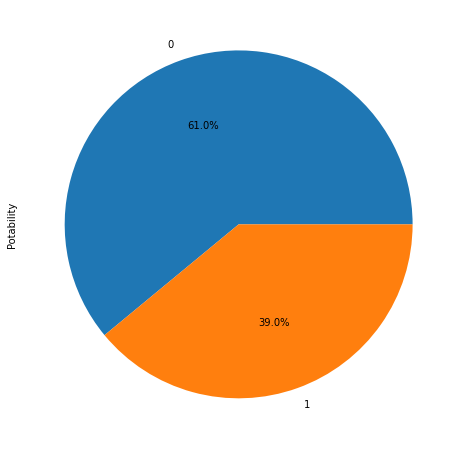

In [20]:
print(df["Potability"].value_counts())
df["Potability"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

<a id="4.3"></a>
<font color="lightseagreen" size=+1.5><b>4.3 - The Examination of Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [21]:
numerical_features = df.drop("Potability", axis=1)
numerical_features.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [22]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [23]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [24]:
numerical_features.iplot(kind='hist');

In [25]:
numerical_features.iplot(kind='histogram',subplots=True,bins=50)

In [26]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [27]:
for i in df.drop(columns=["Potability"]).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

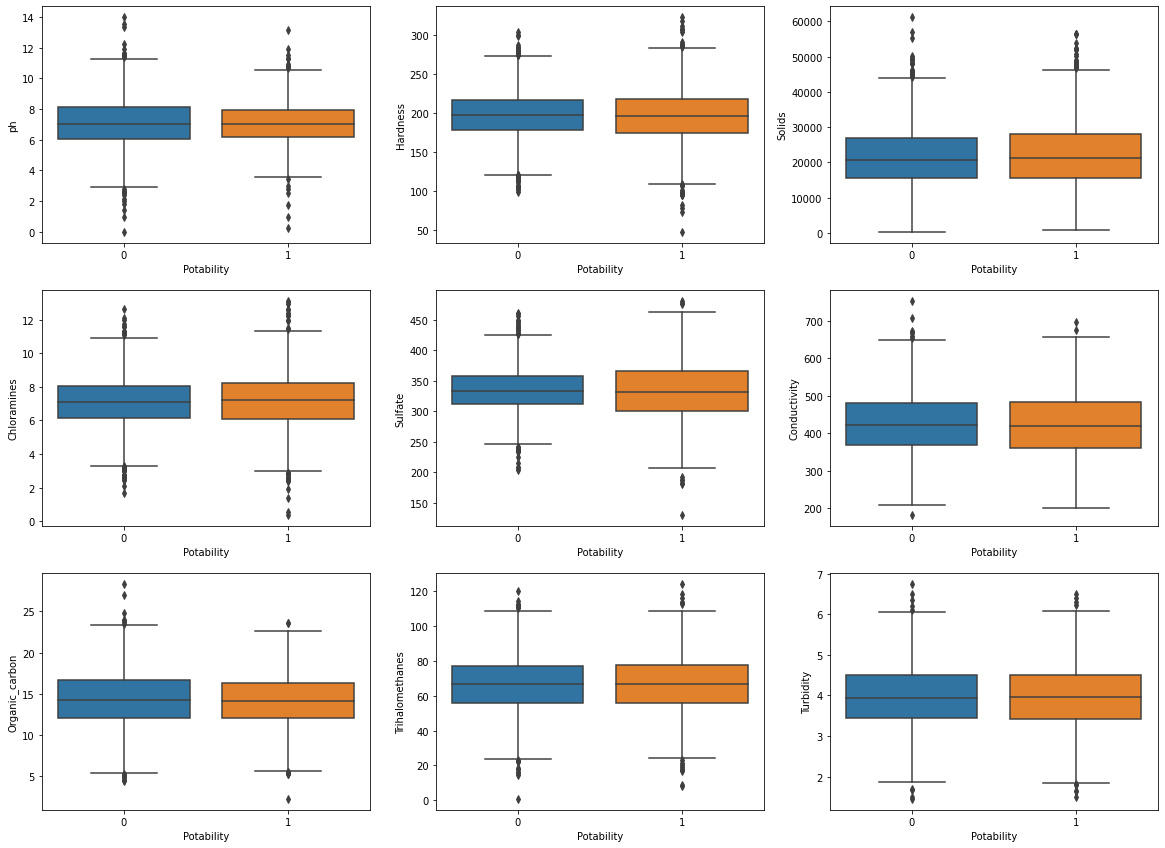

In [28]:
index = 0
plt.figure(figsize=(20, 20))
for feature in df.columns:
    if feature != "Potability":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='Potability', y=feature, data=df)

In [29]:
# The Visualization of Numerical Features in detail

cols=df.columns

In [30]:
# for i in cols:
#     colours=["#f7b2b0","#8f7198", "#003f5c"]
#     sns.swarmplot(x=df["Potability"], y=df[i], color="black", alpha=0.5 )
#     sns.boxenplot(x=df["Potability"], y=df[i], palette=colours)
#     plt.show()

In [31]:
# plt.figure(figsize=(12, 6))
# sns.pairplot(df, hue='Potability', palette='Dark2')
# plt.show()

In [32]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [33]:
fig = px.scatter_3d(df, 
                    x='Hardness',
                    y='Sulfate',
                    z='Chloramines',
                    color='Potability')
fig.show();

<a id="4.4"></a>
<font color="lightseagreen" size=+1.5><b>4.4 - The Examination of Skewness & Kurtosis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Skewness is a key statistics concept you must know in the data science and analytics fields.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. 

The primary reason skewness is important is that any analysis based on normal distribution incorrectly estimates expected returns and risk.

For more information please refer to [external link text](https://en.wikipedia.org/wiki/Skewness) [external link text](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/) [external link text](http://www.fusioninvesting.com/2010/09/what-is-skew-and-why-is-it-important/) [external link text](https://brownmath.com/stat/shape.htm)

In [34]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

Solids             0.622
Potability         0.451
Conductivity       0.264
ph                 0.026
Organic_carbon     0.026
Turbidity         -0.008
Chloramines       -0.012
Sulfate           -0.036
Hardness          -0.039
Trihalomethanes   -0.083
dtype: float64

In [35]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

Solids   0.622
dtype: float64

In [36]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   0.025630447632210205  means that the distribution is approx.   symmetric 
A skewness value of   -0.0393417047767249  means that the distribution is approx.   symmetric 
A skewness value of   0.6216344855169127  means that the distribution is approx.   moderately skewed 
A skewness value of   -0.01209844012438221  means that the distribution is approx.   symmetric 
A skewness value of   -0.03594662160706187  means that the distribution is approx.   symmetric 
A skewness value of   0.2644902239264119  means that the distribution is approx.   symmetric 
A skewness value of   0.025532582090242492  means that the distribution is approx.   symmetric 
A skewness value of   -0.08303067407901553  means that the distribution is approx.   symmetric 
A skewness value of   -0.007816642377392604  means that the distribution is approx.   symmetric 
A skewness value of   0.4507837491078628  means that the distribution is approx.   symmetric 


**Kurtosis are of three types:**

**Mesokurtic:** When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

**Leptokurtic:** If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

**Platykurtic:** Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic.

Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7.

Multi-normality data tests are performed using leveling asymmetry tests (skewness < 3), (Kurtosis between -2 and 2) and Mardia criterion (< 3). Source Chemingui, H., & Ben lallouna, H. (2013).

Skewness and kurtosis index were used to identify the normality of the data. The result suggested the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively (Kline, 2011). Source Yadav, R., & Pathak, G. S. (2016). 

In [37]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

ph                 0.720
Sulfate            0.648
Hardness           0.616
Chloramines        0.590
Solids             0.443
Trihalomethanes    0.239
Organic_carbon     0.044
Turbidity         -0.063
Conductivity      -0.277
Potability        -1.798
dtype: float64

In [38]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

In consistent with the explanations above, the dataset seems to be OK regarding skewness and kurtosis concepts.

Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

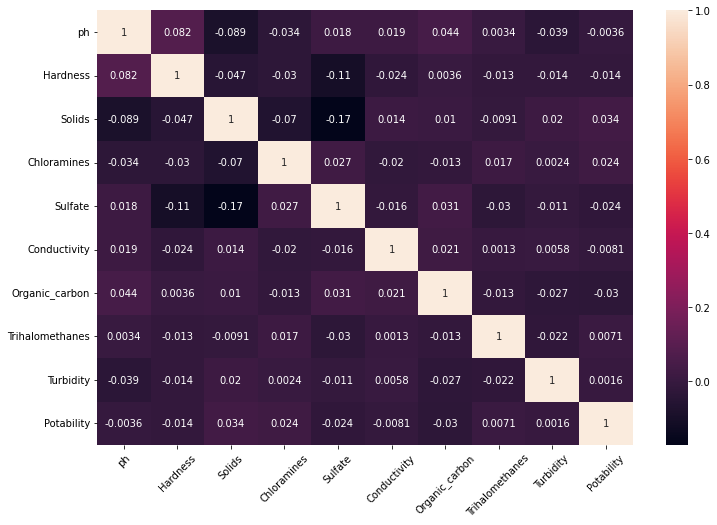

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [40]:
# import colorama
# from colorama import Fore, Style

In [41]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For ph and ph, there is NO multicollinearity problem
For ph and Hardness, there is NO multicollinearity problem
For ph and Solids, there is NO multicollinearity problem
For ph and Chloramines, there is NO multicollinearity problem
For ph and Sulfate, there is NO multicollinearity problem
For ph and Conductivity, there is NO multicollinearity problem
For ph and Organic_carbon, there is NO multicollinearity problem
For ph and Trihalomethanes, there is NO multicollinearity problem
For ph and Turbidity, there is NO multicollinearity problem
For ph and Potability, there is NO multicollinearity problem
For Hardness and ph, there is NO multicollinearity problem
For Hardness and Hardness, there is NO multicollinearity problem
For Hardness and Solids, there is NO multicollinearity problem
For Hardness and Chloramines, there is NO multicollinearity problem
For Hardness and Sulfate, there is NO multicollinearity problem
For Hardness and Conductivity, there is NO multicollinearity problem
For Hard

<a id="5"></a>
<font color="lightseagreen" size=+2.5><b>5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="5.1"></a>
<font color="lightseagreen" size=+1.5><b>5.1 Train | Test Split</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

We must separate the columns (attributes or features) of the dataset into input patterns (X) and output patterns (y).

In [42]:
X = df.drop(["Potability"], axis=1)
y = df["Potability"]

Finally, we must split the X and Y data into a training and test dataset. The training set will be used to prepare the models used in this study and the test set will be used to make new predictions, from which we can evaluate the performance of the model.

For this we will use the train_test_split() function from the scikit-learn library. We also specify a seed for the random number generator so that we always get the same split of data each time this example is executed.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

<a id="5.2"></a>
<font color="lightseagreen" size=+1.5><b>5.2 Handling with Missing Values</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [44]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [45]:
imputed_X_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [46]:
imputed_X_test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [47]:
X_test = imputed_X_test

In [48]:
X_train = imputed_X_train

<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>6) FEATURE SCALLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Feature scaling (Normalization) is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. 

For machine learning, in general, it is necessary to normalize features so that no features are arbitrarily large (centering) and all features are on the same scale (scaling).

In general, algorithms that exploit distances or similarities (e.g. in the form of scalar product) between data samples, such as K-NN and SVM, are sensitive to feature transformations. So it is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors.

However, Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling, but still, it might be a good idea to rescale/standardize your data.

NOTE: XGBoost actually implements a second algorithm too, based on linear boosting. Scaling will make a difference there

For more information please refer to [external link text](https://en.wikipedia.org/wiki/Feature_scaling) [external link text](https://www.dataschool.io/comparing-supervised-learning-algorithms/)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="7"></a>
<font color="lightseagreen" size=+2.5><b>7) MODELLING & MODEL PERFORMANCE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [52]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [53]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [54]:
# General Insights

def model_first_insight(X_train, y_train, class_weight):
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
   
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=101, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=101)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=101)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    
    return log, svc, decision_tree, random_forest, knn, gb, ab, xgb

In [55]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=101, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=101)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=101)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb}")
  
    return log.score(X_train, y_train), svc.score(X_train, y_train),decision_tree.score(X_train, y_train),random_forest.score(X_train, y_train),knn.score(X_train, y_train),gb.score(X_train, y_train),ab.score(X_train, y_train),xgb.score(X_train, y_train)

In [56]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [57]:
models_accuracy(X_train, y_train)

BASIC ACCURACY
[20:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101)
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jo

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101)
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jo

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101)
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101)
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.

We created a User Defined Function for comparing scores in Train & Test Sets at the end of the study.

In [58]:
# Function for comparing scores in Train & Test Sets

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

We are now ready to train our models.

After determining related Classifiers from the scikit-learn framework, we can create and and fit them to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.

Then we can make predictions using the fit model on the test dataset. To make predictions we use the scikit-learn function model.predict().

<a id="7.1"></a>
<font color="lightseagreen" size=+1.5><b>7.1 The Implementation of Logistic Regression (LR)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [59]:
### LIBRARIES NEEDED IN TIS SECTION ###

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import plot_roc_curve
# from sklearn.metrics import roc_curve, auc

<a id="7.1.a"></a>
<font color="lightseagreen" size=+0.5><b>7.1.a Modelling Logistic Regression (LR) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[500   0]
 [319   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       500
           1       0.00      0.00      0.00       319

    accuracy                           0.61       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.37      0.61      0.46       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.610     0.611
Precision      0.000     0.000
Recall         0.000     0.000
f1             0.000     0.000

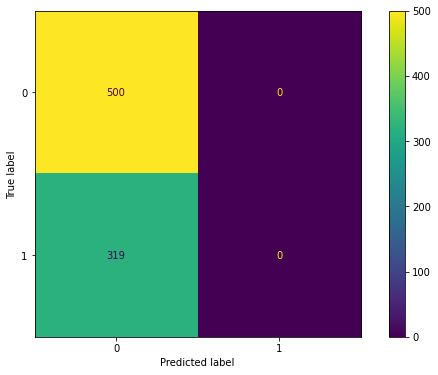

In [60]:
LR1_model = LogisticRegression()  # Without "balanced" the model knows all 0's but nothing for 1's. It looks like 
                                  # there has been a problem. So we will check results by class_weight = "balanced"
LR1_model.fit(X_train_scaled, y_train)
y_pred = LR1_model.predict(X_test_scaled)
y_train_pred = LR1_model.predict(X_train_scaled)

log1_f1 = f1_score(y_test, y_pred)
log1_acc = accuracy_score(y_test, y_pred)
log1_recall = recall_score(y_test, y_pred)
log1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR1_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[256 244]
 [154 165]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       500
           1       0.40      0.52      0.45       319

    accuracy                           0.51       819
   macro avg       0.51      0.51      0.51       819
weighted avg       0.54      0.51      0.52       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.520     0.514
Precision      0.406     0.403
Recall         0.498     0.517
f1             0.448     0.453

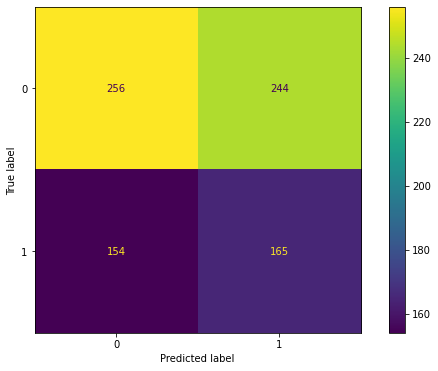

In [61]:
LR_model = LogisticRegression(class_weight = "balanced")  
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [62]:
LR_model.intercept_

array([-0.00073675])

In [63]:
LR_model.coef_

array([[ 0.02900068,  0.00350833,  0.06043427,  0.04018271,  0.01005403,
         0.02092761, -0.03301748, -0.00975115,  0.00808137]])

In [64]:
y_pred = LR_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [65]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.52366412, 0.47633588],
       [0.54204594, 0.45795406],
       [0.48710223, 0.51289777],
       ...,
       [0.50066927, 0.49933073],
       [0.49098846, 0.50901154],
       [0.5145483 , 0.4854517 ]])

In [66]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
547   7.511   182.193 17100.887        5.949  357.266       499.095   
2371  6.889   188.921 27368.014        8.003  355.479       465.347   
2198  6.794   227.226 14470.054        8.472  274.445       360.756   
2998  9.131   200.032 28273.603        7.498  334.239       453.874   
2278  6.382   199.635 20453.817        5.849  334.239       344.600   
2282 10.525   256.172 31965.364        5.007  288.566       505.361   
392   6.664   199.589 15902.945        5.258  346.585       347.353   
1408  9.229   180.945 10345.399        6.057  334.239       397.043   
561   6.625   172.055 14877.290        7.080  338.441       405.818   
2911  9.504   195.109 19946.265        7.468  300.680       382.473   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  pred  pred_proba  
547           20.726           60.671      3.342           0     0       0.475  
2371          12.377           75.112      4.512           1     1       0.522  
2198          19.402           40.291      4.823           0     0       0.480  
2998          12.861           64.178      3.026           0     1       0.526  
2278          16.651           68.313      4.658           0     0       0.476  
2282          12.537           75.343      4.341           0     1       0.528  
392           15.989           61.157      2.228           1     0       0.464  
1408          18.215           53.977      3.839           0     0       0.473  
561           15.656           58.561      4.334           0     0       0.482  
2911          14.359           78.307      4.343           0     1       0.504

<a id="7.1.b"></a>
<font color="lightseagreen" size=+0.5><b>7.1.b Cross-Validating Logistic Regression (LR) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

**scores without "class_weight = "balanced"**

In [67]:
log_xvalid1_model = LogisticRegression()

log_xvalid1_model_scores = cross_validate(log_xvalid1_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
log_xvalid1_model_scores = pd.DataFrame(log_xvalid1_model_scores, index = range(1, 11))

log_xvalid1_model_scores

fit_time  score_time  test_accuracy  test_precision_weighted  \
1      0.012       0.008          0.610                    0.372   
2      0.011       0.006          0.610                    0.372   
3      0.008       0.007          0.610                    0.372   
4      0.006       0.005          0.610                    0.372   
5      0.008       0.005          0.606                    0.371   
6      0.007       0.009          0.610                    0.372   
7      0.008       0.006          0.610                    0.372   
8      0.008       0.005          0.612                    0.375   
9      0.010       0.010          0.608                    0.370   
10     0.014       0.005          0.608                    0.370   

    test_recall_weighted  test_f1_weighted  
1                  0.610             0.462  
2                  0.610             0.462  
3                  0.610             0.462  
4                  0.610             0.462  
5                  0.606             0.460  
6                  0.610             0.462  
7                  0.610             0.462  
8                  0.612             0.465  
9                  0.608             0.460  
10                 0.608             0.460

In [68]:
log_xvalid1_model_scores.mean()[2:]

test_accuracy             0.609
test_precision_weighted   0.372
test_recall_weighted      0.609
test_f1_weighted          0.462
dtype: float64

**scores with "class_weight = "balanced"**

In [69]:
log_xvalid_model = LogisticRegression(class_weight = "balanced")

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                          'f1_weighted'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))

log_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision_weighted  \
1      0.011       0.011          0.435                    0.457   
2      0.010       0.005          0.480                    0.503   
3      0.007       0.005          0.459                    0.490   
4      0.013       0.005          0.476                    0.508   
5      0.006       0.005          0.455                    0.463   
6      0.008       0.007          0.476                    0.501   
7      0.007       0.006          0.488                    0.506   
8      0.006       0.006          0.424                    0.448   
9      0.019       0.007          0.461                    0.486   
10     0.008       0.005          0.506                    0.519   

    test_recall_weighted  test_f1_weighted  
1                  0.435             0.442  
2                  0.480             0.486  
3                  0.459             0.465  
4                  0.476             0.481  
5                  0.455             0.459  
6                  0.476             0.482  
7                  0.488             0.494  
8                  0.424             0.432  
9                  0.461             0.468  
10                 0.506             0.511

In [70]:
log_xvalid_model_scores.mean()[2:]

test_accuracy             0.466
test_precision_weighted   0.488
test_recall_weighted      0.466
test_f1_weighted          0.472
dtype: float64

<a id="7.1.c"></a>
<font color="lightseagreen" size=+0.5><b>7.1.c Modelling Logistic Regression (LR) with Best Parameters Using GridSeachCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

**LogisticRegression automatically makes regularizition and Default parameter is Ridge. We can change this parameter in accordance with our concept and/or dataset.**

Special Note:

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

Warning:

The choice of the algorithm depends on the penalty chosen: Supported penalties by solver: ‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

**We prefer "saga" since we selected "l1", "l2" and "elasticnet" as penalty.**

For more information please refer to [external link text](
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [71]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [72]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [73]:
LR_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

Let's look at the best parameters & estimator found by GridSearchCV.

In [74]:
print(colored('\033[1mBest Parameters of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for LR Model: {'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: LogisticRegression(C=11.28837891684689, class_weight='balanced', l1_ratio=0.0,
                   max_iter=5000, penalty='l1', solver='saga')


[[256 244]
 [154 165]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       500
           1       0.40      0.52      0.45       319

    accuracy                           0.51       819
   macro avg       0.51      0.51      0.51       819
weighted avg       0.54      0.51      0.52       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.520     0.514
Precision      0.407     0.403
Recall         0.499     0.517
f1             0.448     0.453

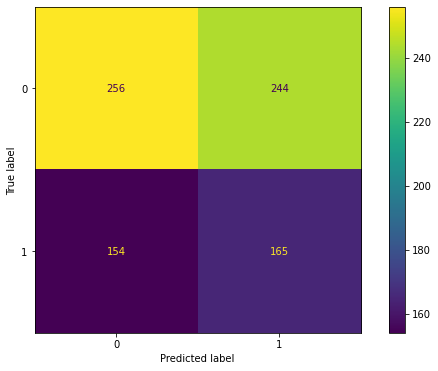

In [75]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**GridSearchCV could NOT make any contribution to our model's development. Rather our accuracy score decreased.**

<a id="7.1.d"></a>
<font color="lightseagreen" size=+0.5><b>7.1.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

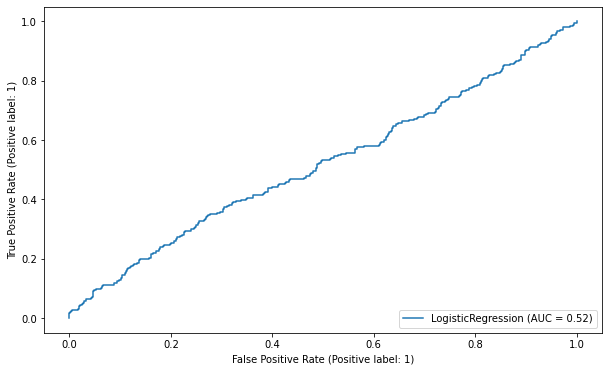

In [76]:
plot_roc_curve(LR_model, X_test_scaled, y_test);

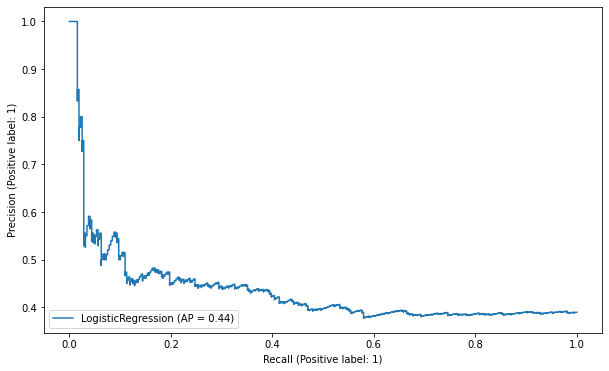

In [77]:
plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

<a id="7.2"></a>
<font color="lightseagreen" size=+1.5><b>7.2 The Implementation of Support Vector Machine (SVM)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [78]:
### LIBRARIES NEEDED IN THIS SECTION ###

# from sklearn.svm import SVC
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV

<a id="7.2.a"></a>
<font color="lightseagreen" size=+0.5><b>7.2.a Modelling Support Vector Machine (SVM) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[412  88]
 [246  73]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       500
           1       0.45      0.23      0.30       319

    accuracy                           0.59       819
   macro avg       0.54      0.53      0.51       819
weighted avg       0.56      0.59      0.55       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.585     0.592
Precision      0.436     0.453
Recall         0.213     0.229
f1             0.286     0.304

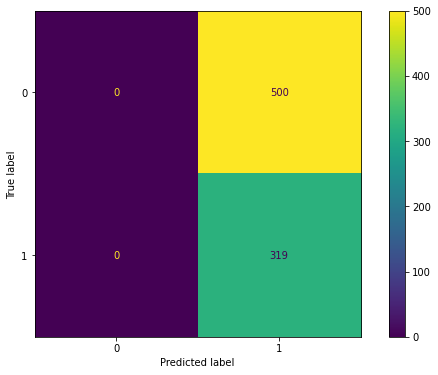

In [79]:
# Without Scaling

SVM1_model = SVC(class_weight = "balanced")
SVM1_model.fit(X_train, y_train)
y_pred = SVM1_model.predict(X_test)
y_train_pred = SVM1_model.predict(X_train)

svm1_f1 = f1_score(y_test, y_pred)
svm1_acc = accuracy_score(y_test, y_pred)
svm1_recall = recall_score(y_test, y_pred)
svm1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM1_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[352 148]
 [158 161]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       500
           1       0.52      0.50      0.51       319

    accuracy                           0.63       819
   macro avg       0.61      0.60      0.60       819
weighted avg       0.62      0.63      0.63       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.761     0.626
Precision      0.696     0.521
Recall         0.689     0.505
f1             0.693     0.513

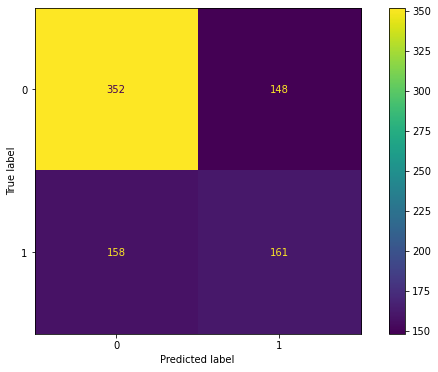

In [80]:
# With Scaling

SVM_model = SVC(class_weight = "balanced")
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Cross-checking the model by predictions in Train Set for consistency**

[[1209  289]
 [ 298  661]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1498
           1       0.70      0.69      0.69       959

    accuracy                           0.76      2457
   macro avg       0.75      0.75      0.75      2457
weighted avg       0.76      0.76      0.76      2457

--------------------------------------------------------


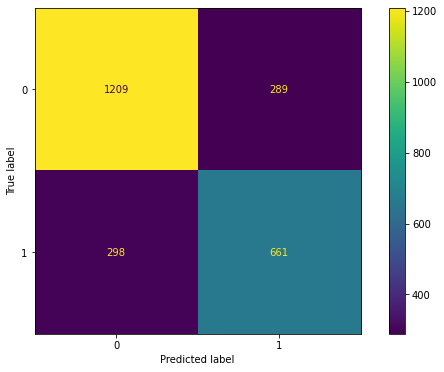

In [81]:
y_train_pred = SVM_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_train_scaled, y_train);

<a id="7.2.b"></a>
<font color="lightseagreen" size=+0.5><b>7.2.b Cross-Validating Support Vector Machine (SVM) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [82]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision_weighted  \
1      0.345       0.073          0.663                    0.669   
2      0.347       0.085          0.699                    0.712   
3      0.446       0.072          0.667                    0.669   
4      0.327       0.071          0.699                    0.730   
5      0.365       0.072          0.659                    0.664   
6      0.435       0.094          0.691                    0.698   
7      0.341       0.066          0.699                    0.724   
8      0.381       0.124          0.637                    0.623   
9      0.383       0.094          0.682                    0.678   
10     0.403       0.112          0.657                    0.650   

    test_recall_weighted  test_f1_weighted  
1                  0.663             0.613  
2                  0.699             0.666  
3                  0.667             0.624  
4                  0.699             0.656  
5                  0.659             0.606  
6                  0.691             0.659  
7                  0.699             0.658  
8                  0.637             0.582  
9                  0.682             0.657  
10                 0.657             0.621

In [83]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy             0.675
test_precision_weighted   0.682
test_recall_weighted      0.675
test_f1_weighted          0.634
dtype: float64

In [84]:
svm_xvalid_model = SVC(class_weight = "balanced")

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores.mean()[2:]

test_accuracy             0.659
test_precision_weighted   0.661
test_recall_weighted      0.659
test_f1_weighted          0.658
dtype: float64

<a id="7.2.c"></a>
<font color="lightseagreen" size=+0.5><b>7.2.c Modelling Support Vector Machine (SVM)  with Best Parameters Using GridSeachCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [85]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [86]:
SVM_grid_model = SVC(class_weight = "balanced")

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [87]:
SVM_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.638 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.657 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.627 total time=   0.3s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.633 total time=   0.3s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.617 total time=   0.3s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.506 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.522 total time=   0.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.475 total time=   0.1s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.464 total time=   0.3s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.481 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.638 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.4s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.3s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.3s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.3s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.508 total time=   0.2s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.522 total time=   0.2s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.481 total time=   0.2s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.458 total time=   0.2s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.481 total time=   0.2s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.640 total time=   0.3s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.3s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.607 total time=   0.3s
[CV 4/5] END .......C=1, gam

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.4s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.426 total time=   0.4s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.510 total time=   0.9s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.522 total time=   1.1s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.481 total time=   1.2s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.458 total time=   1.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.481 total time=   0.8s
[CV 1/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.612 total time=   1.2s
[CV 2/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.612 total time=   1.2s
[CV 3/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.621 total time=   1.3s
[CV 4/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.631 total time=   1.0s
[CV 5/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.597 total time=   1.1s
[CV 1/5] END .C=100, gamma=s

[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.510 total time=  30.8s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.524 total time=  30.6s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.477 total time=  33.5s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.460 total time=  35.5s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.485 total time=  28.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.602 total time=   3.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.591 total time=   2.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.627 total time=   2.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.619 total time=   2.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.566 total time=   2.5s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.510 total time=  31.6s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.524 total time=  30.8s
[CV 3/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

Let's look at the best parameters & estimator found by GridSearchCV.

In [88]:
print(colored('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(SVM_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(SVM_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for SVM Model: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for SVM Model: SVC(C=1, class_weight='balanced')


[[352 148]
 [158 161]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       500
           1       0.52      0.50      0.51       319

    accuracy                           0.63       819
   macro avg       0.61      0.60      0.60       819
weighted avg       0.62      0.63      0.63       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.761     0.626
Precision      0.696     0.521
Recall         0.689     0.505
f1             0.693     0.513

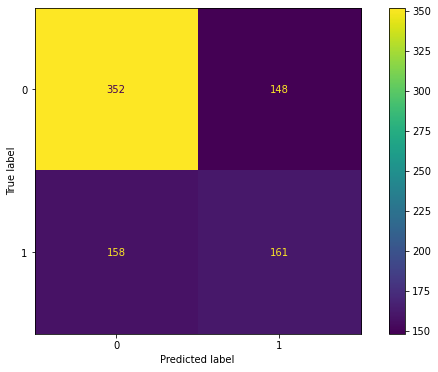

In [89]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**While GridSearchCV improved our Negative False predictions, it worsened our True Positive predictions.**

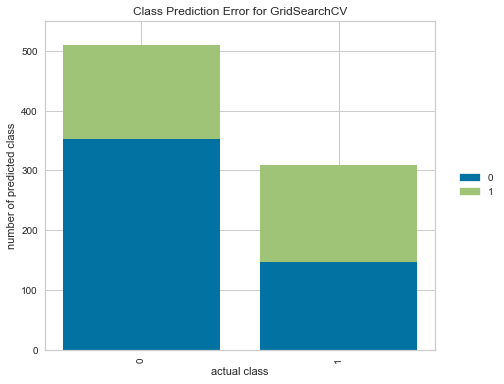

In [90]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

<a id="7.2.d"></a>
<font color="lightseagreen" size=+0.5><b>7.2.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

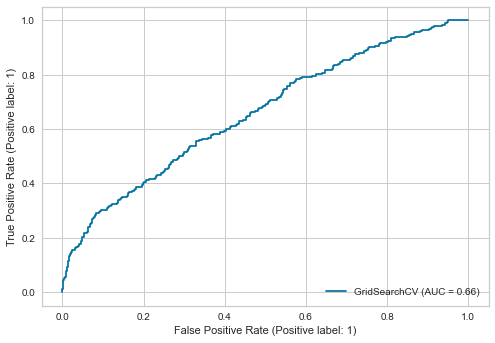

In [91]:
plot_roc_curve(SVM_grid_model, X_test_scaled, y_test);

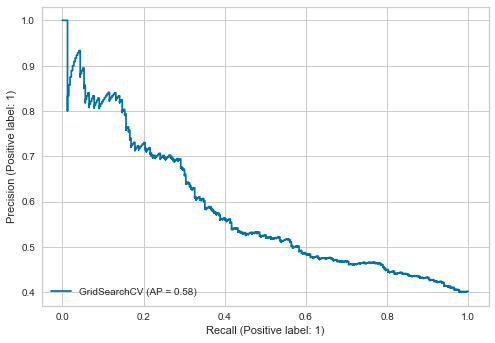

In [92]:
plot_precision_recall_curve(SVM_grid_model, X_test_scaled, y_test);

<a id="7.3"></a>
<font color="lightseagreen" size=+1.5><b>7.3 The Implementation of Decision Tree (DT)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [93]:
### LIBRARIES NEEDED IN THIS SECTION ###

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.model_selection import GridSearchCV

<a id="7.3.a"></a>
<font color="lightseagreen" size=+0.5><b>7.3.a Modelling Decision Tree (DT) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[338 162]
 [176 143]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       500
           1       0.47      0.45      0.46       319

    accuracy                           0.59       819
   macro avg       0.56      0.56      0.56       819
weighted avg       0.58      0.59      0.59       819

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.587
Precision      1.000     0.469
Recall         1.000     0.448
f1             1.000     0.458

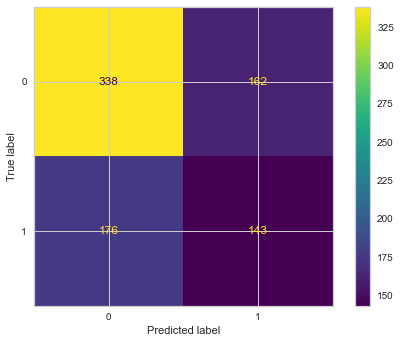

In [94]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

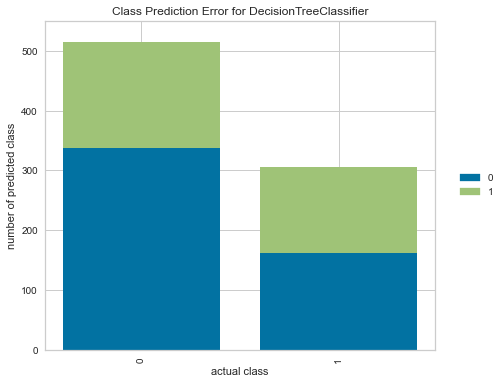

In [95]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

<a id="7.3.b"></a>
<font color="lightseagreen" size=+0.5><b>7.3.b Cross-Validating Decision Tree (DT)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [96]:
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.031       0.008          0.581                 0.565   
2      0.032       0.012          0.646                 0.627   
3      0.044       0.005          0.589                 0.569   
4      0.033       0.005          0.602                 0.590   
5      0.044       0.007          0.610                 0.588   
6      0.047       0.007          0.606                 0.590   
7      0.029       0.006          0.520                 0.500   
8      0.033       0.005          0.563                 0.541   
9      0.029       0.005          0.518                 0.509   
10     0.037       0.005          0.571                 0.553   

    test_recall_macro  test_f1_macro  
1               0.567          0.565  
2               0.626          0.626  
3               0.570          0.569  
4               0.593          0.590  
5               0.586          0.587  
6               0.592          0.591  
7               0.500          0.500  
8               0.541          0.541  
9               0.510          0.507  
10              0.553          0.553

In [97]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy          0.581
test_precision_macro   0.563
test_recall_macro      0.564
test_f1_macro          0.563
dtype: float64

<a id="7.3.c"></a>
<font color="lightseagreen" size=+0.5><b>7.3.c Modelling Decision Tree (DT) with Best Parameters Using GridSeachCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [98]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [99]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [100]:
print(colored('\033[1mBest Parameters of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for DT Model: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for DT Model: DecisionTreeClassifier(class_weight='balanced', max_features=7,
                       min_samples_leaf=5, random_state=42, splitter='random')


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[[275 225]
 [142 177]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       500
           1       0.44      0.55      0.49       319

    accuracy                           0.55       819
   macro avg       0.55      0.55      0.55       819
weighted avg       0.57      0.55      0.56       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.737     0.552
Precision      0.627     0.440
Recall         0.809     0.555
f1             0.706     0.491

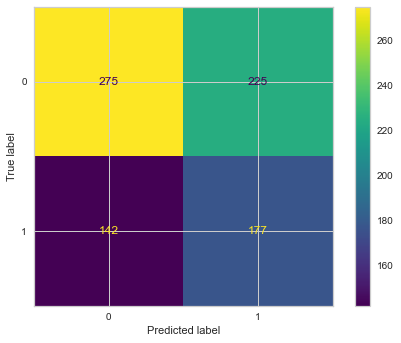

In [101]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

<a id="7.3.d"></a>
<font color="lightseagreen" size=+0.5><b>7.3.d Feature Importance for Decision Tree (DT) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [102]:
DT_model.feature_importances_

array([0.13344511, 0.13131693, 0.10115176, 0.12065689, 0.12533899,
       0.09148746, 0.08599391, 0.09389356, 0.11671539])

In [103]:
DT_feature_imp = pd.DataFrame(index = X.columns, data = DT_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
DT_feature_imp

Feature Importance
ph                            0.133
Hardness                      0.131
Sulfate                       0.125
Chloramines                   0.121
Turbidity                     0.117
Solids                        0.101
Trihalomethanes               0.094
Conductivity                  0.091
Organic_carbon                0.086

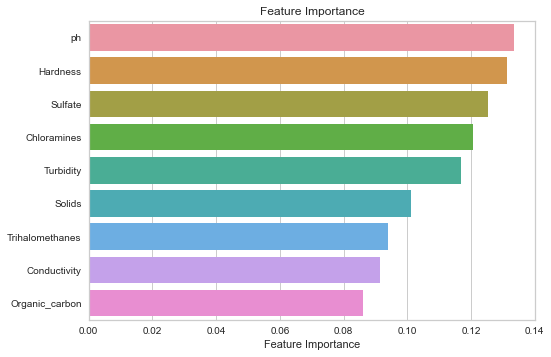

In [104]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [105]:
# The feature that weighs too much on the estimation can sometimes cause overfitting. 
# For this reason, the most important feature can be dropped and the scores can be checked again.

X2 = X.drop(columns = ["Hardness"]) 

In [108]:
X2.columns

Index(['ph', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [109]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [110]:
# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_X2_train = pd.DataFrame(my_imputer.fit_transform(X2_train))
imputed_X2_test = pd.DataFrame(my_imputer.transform(X2_test))

# Imputation removed column names; put them back
imputed_X2_train.columns = X2_train.columns
imputed_X2_test.columns = X2_test.columns

In [111]:
X2_train = imputed_X_train
X2_test = imputed_X_test

In [112]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

[[311 199]
 [187 122]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       510
           1       0.38      0.39      0.39       309

    accuracy                           0.53       819
   macro avg       0.50      0.50      0.50       819
weighted avg       0.53      0.53      0.53       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.526     0.529
Precision      0.398     0.380
Recall         0.394     0.395
f1             0.396     0.387

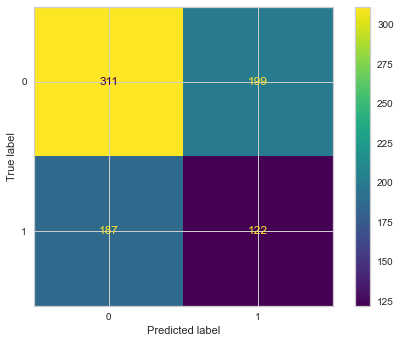

In [113]:
DT_tuned_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)
DT_tuned_model.fit(X2_train_scaled, y2_train)
y2_pred = DT_tuned_model.predict(X2_test_scaled)

y2_train_pred = DT_model.predict(X_train_scaled)

dt_tuned_f1 = f1_score(y_test, y_pred)
dt_tuned_acc = accuracy_score(y_test, y_pred)
dt_tuned_recall = recall_score(y_test, y_pred)
dt_tuned_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y2_test, y2_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y2_test, y2_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_tuned_model, X2_test_scaled, y2_test)

train_val(y2_train, y2_train_pred, y2_test, y2_pred)

**Droping the feature that weighs too much on the estimation did NOT make any sense.**

<a id="7.3.e"></a>
<font color="lightseagreen" size=+0.5><b>7.3.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

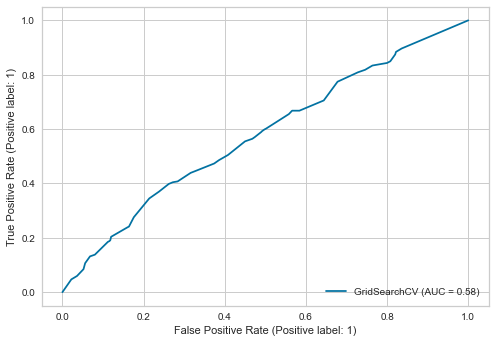

In [114]:
plot_roc_curve(DT_grid_model, X_test_scaled, y_test);

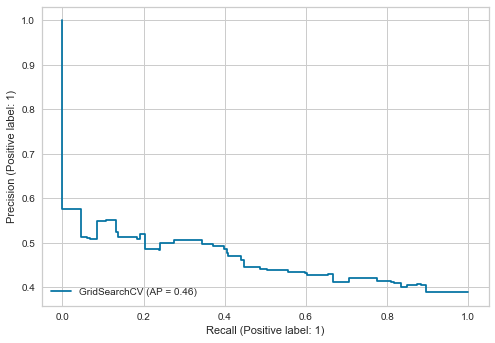

In [115]:
plot_precision_recall_curve(DT_grid_model, X_test_scaled, y_test);

<a id="7.3.f"></a>
<font color="lightseagreen" size=+0.5><b>7.3.f The Visualization of the Tree</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

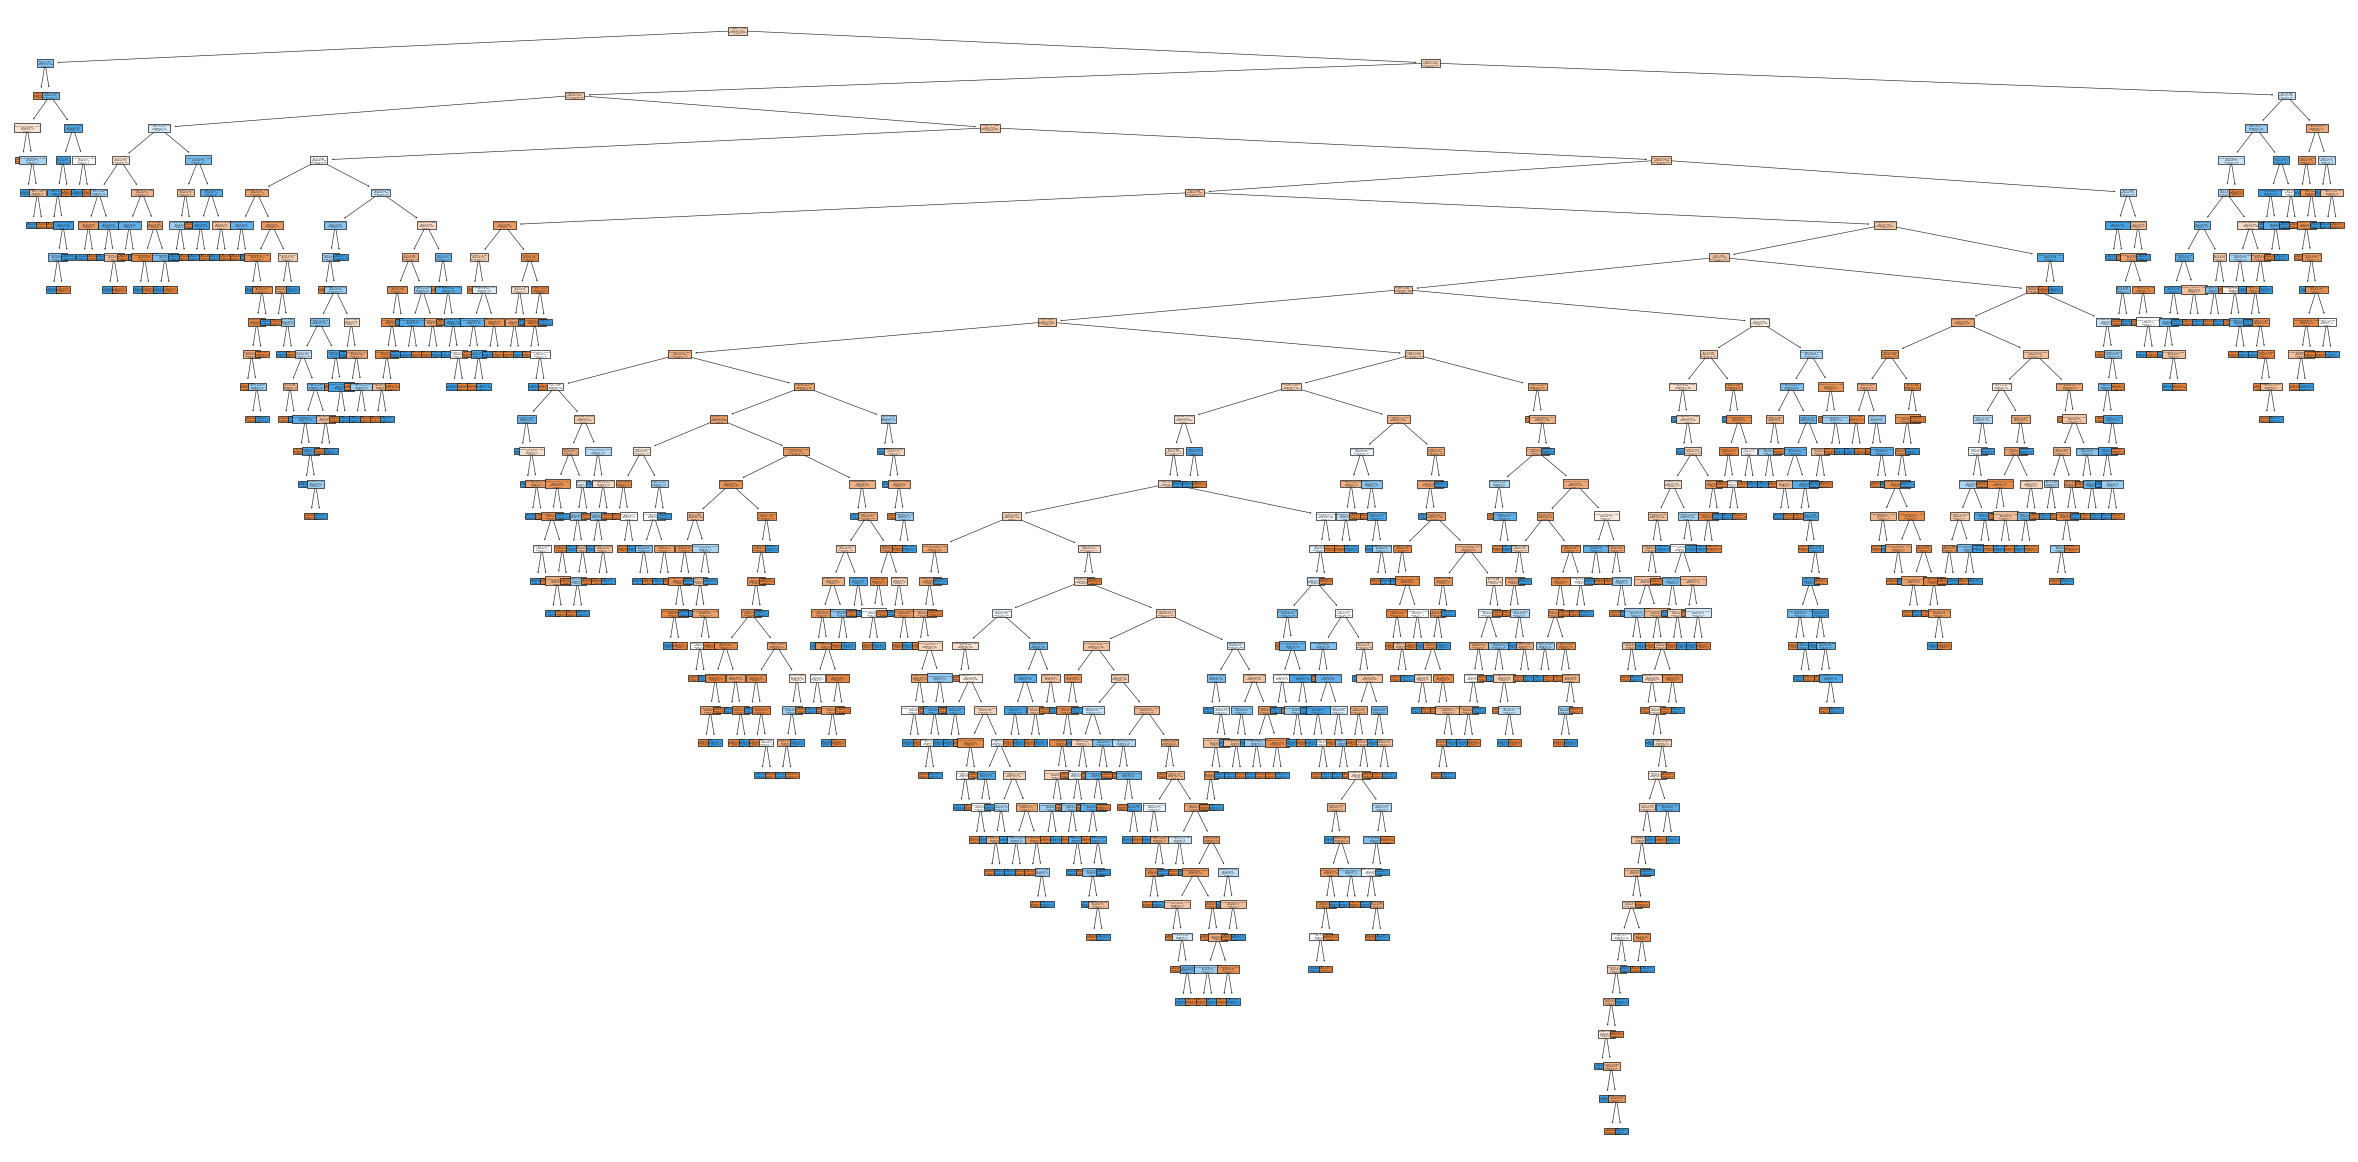

In [116]:
# from sklearn.tree import plot_tree

features = list(X.columns)
targets = str(df.Potability.unique())

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10), dpi=150)
plot_tree(DT_model,
          feature_names = features,
          class_names=targets,
          filled = True);

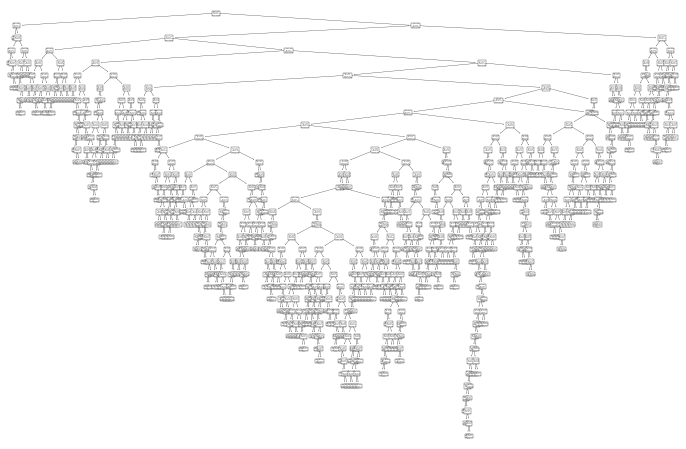

In [117]:
plt.figure(figsize=(12, 8))
plot_tree(DT_model);

**Let's check the results after pruning the trees**

In [118]:
### Optional User Defined Function to print and plot the predictions in one-hand ###

# def report_model(model):
#     model_pred = model.predict(X_test_scaled)
#     model_train_pred = model.predict(X_train_scaled)
#     print(f"\033[1mTest Set\033[0m")
#     print("-------------")
#     print(confusion_matrix(y_test, model_pred))
#     print("--------------------------------------------------------")
#     print(classification_report(y_test, model_pred))
#     print("\033[1m--------------------------------------------------------\033[0m")
#     print(f"\033[1mTrain Set\033[0m")
#     print("-------------")
#     print(confusion_matrix(y_train, model_train_pred))
#     print("\033[1m--------------------------------------------------------\033[0m")
#     print(classification_report(y_train, model_train_pred))
#     print("\033[1m--------------------------------------------------------\033[0m")
    
#     features = list(X.columns)
#     targets = str(df.Potability.unique())

#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=150)
#     plot_tree(DT_model, feature_names=features, class_names=targets, filled=True);

In [119]:
pruned_tree = DecisionTreeClassifier(class_weight = "balanced", max_depth=3, random_state=42)
pruned_tree.fit(X2_train_scaled, y2_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [120]:
# report_model(pruned_tree)

<a id="7.4"></a>
<font color="lightseagreen" size=+1.5><b>7.4 The Implementation of Random Forest (RF)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [121]:
### LIBRARIES NEEDED IN THIS SECTION ###

# from sklearn.ensemble import RandomForestClassifier

<a id="7.4.a"></a>
<font color="lightseagreen" size=+0.5><b>7.4.a Modelling Random Forest (RF) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[442  58]
 [226  93]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       500
           1       0.62      0.29      0.40       319

    accuracy                           0.65       819
   macro avg       0.64      0.59      0.58       819
weighted avg       0.64      0.65      0.62       819

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.653
Precision      1.000     0.616
Recall         1.000     0.292
f1             1.000     0.396

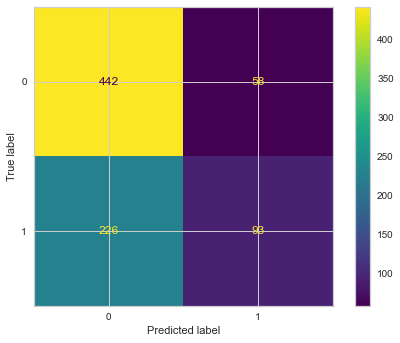

In [122]:
### Without class_weight="balanced" ###

RF1_model = RandomForestClassifier(random_state=42)
RF1_model.fit(X_train_scaled, y_train)
y_pred = RF1_model.predict(X_test_scaled)

y_train_pred = RF1_model.predict(X_train_scaled)

rf1_f1 = f1_score(y_test, y_pred)
rf1_acc = accuracy_score(y_test, y_pred)
rf1_recall = recall_score(y_test, y_pred)
rf1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF1_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[449  51]
 [234  85]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       500
           1       0.62      0.27      0.37       319

    accuracy                           0.65       819
   macro avg       0.64      0.58      0.57       819
weighted avg       0.64      0.65      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.652
Precision      1.000     0.625
Recall         1.000     0.266
f1             1.000     0.374

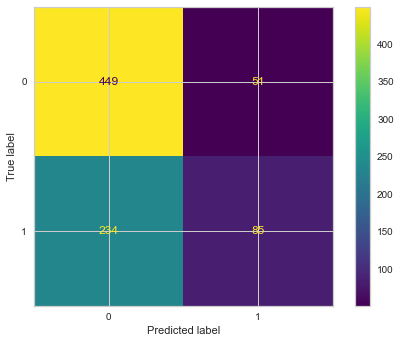

In [123]:
### With class_weight="balanced" ###

RF_model = RandomForestClassifier(class_weight="balanced", random_state=42)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

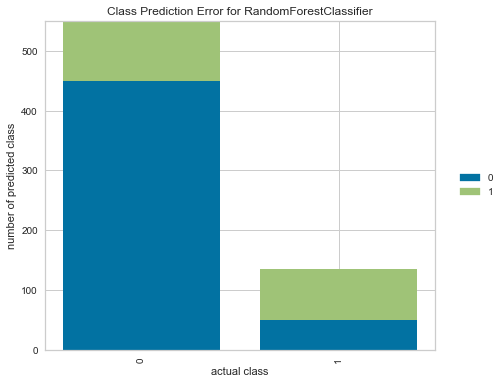

In [124]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

<a id="7.4.b"></a>
<font color="lightseagreen" size=+0.5><b>7.4.b Cross-Validating Random Forest (RF)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [125]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=42)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision_macro  \
1      1.905       0.109          0.695                 0.696   
2      2.588       0.193          0.663                 0.641   
3      2.484       0.024          0.638                 0.614   
4      0.915       0.023          0.691                 0.698   
5      1.562       0.096          0.654                 0.660   
6      1.893       0.025          0.691                 0.687   
7      1.258       0.036          0.679                 0.672   
8      2.534       0.100          0.657                 0.648   
9      1.804       0.039          0.682                 0.670   
10     1.513       0.031          0.682                 0.681   

    test_recall_macro  test_f1_macro  
1               0.639          0.639  
2               0.624          0.626  
3               0.574          0.561  
4               0.630          0.627  
5               0.578          0.553  
6               0.638          0.638  
7               0.622          0.620  
8               0.587          0.573  
9               0.635          0.636  
10              0.623          0.620

In [126]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy          0.673
test_precision_macro   0.667
test_recall_macro      0.615
test_f1_macro          0.609
dtype: float64

<a id="7.4.c"></a>
<font color="lightseagreen" size=+0.5><b>7.4.c Modelling Random Forest (RF) with Best Parameters Using GridSeachCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [127]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [128]:
RF_grid_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)  # Whatch out, fit() can also be used here

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Let's look at the best parameters & estimator found by GridSearchCV.

In [129]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for RF Model: {'max_depth': 7, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=3,
                       min_samples_split=8, n_estimators=50, random_state=42)


[[394 106]
 [190 129]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       500
           1       0.55      0.40      0.47       319

    accuracy                           0.64       819
   macro avg       0.61      0.60      0.60       819
weighted avg       0.63      0.64      0.63       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.821     0.639
Precision      0.839     0.549
Recall         0.668     0.404
f1             0.744     0.466

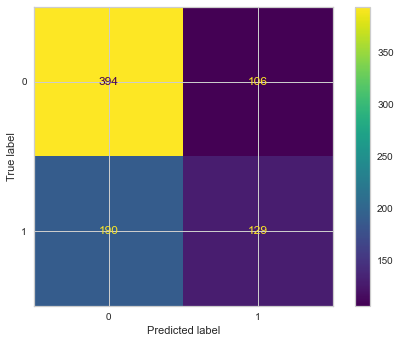

In [130]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

<a id="7.4.d"></a>
<font color="lightseagreen" size=+0.5><b>7.4.d Feature Importance for Random Forest (RF) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [131]:
RF_model.feature_importances_

array([0.13263882, 0.11808714, 0.11428418, 0.11180968, 0.12649168,
       0.10172387, 0.09983842, 0.09736853, 0.09775768])

In [132]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

Feature Importance
ph                            0.133
Sulfate                       0.126
Hardness                      0.118
Solids                        0.114
Chloramines                   0.112
Conductivity                  0.102
Organic_carbon                0.100
Turbidity                     0.098
Trihalomethanes               0.097

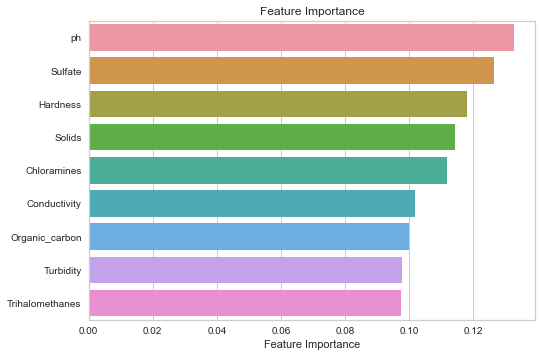

In [133]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

**Let's compare the results with the ones found via Decision Tree**

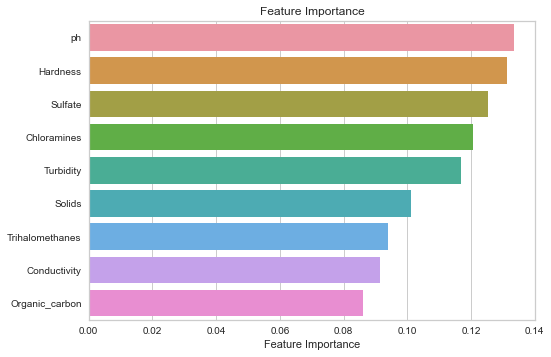

In [134]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

<a id="7.4.e"></a>
<font color="lightseagreen" size=+0.5><b>7.4.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

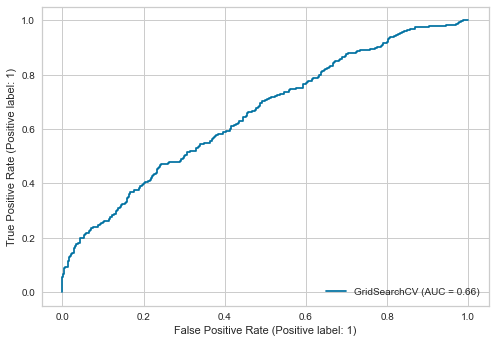

In [135]:
plot_roc_curve(RF_grid_model, X_test_scaled, y_test);

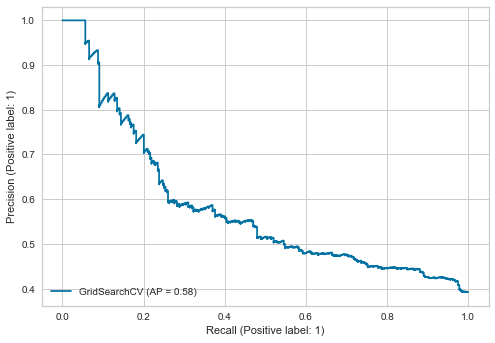

In [136]:
plot_precision_recall_curve(RF_grid_model, X_test_scaled, y_test);

<a id="7.4.f"></a>
<font color="lightseagreen" size=+0.5><b>7.4.f The Visualization of the Tree</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

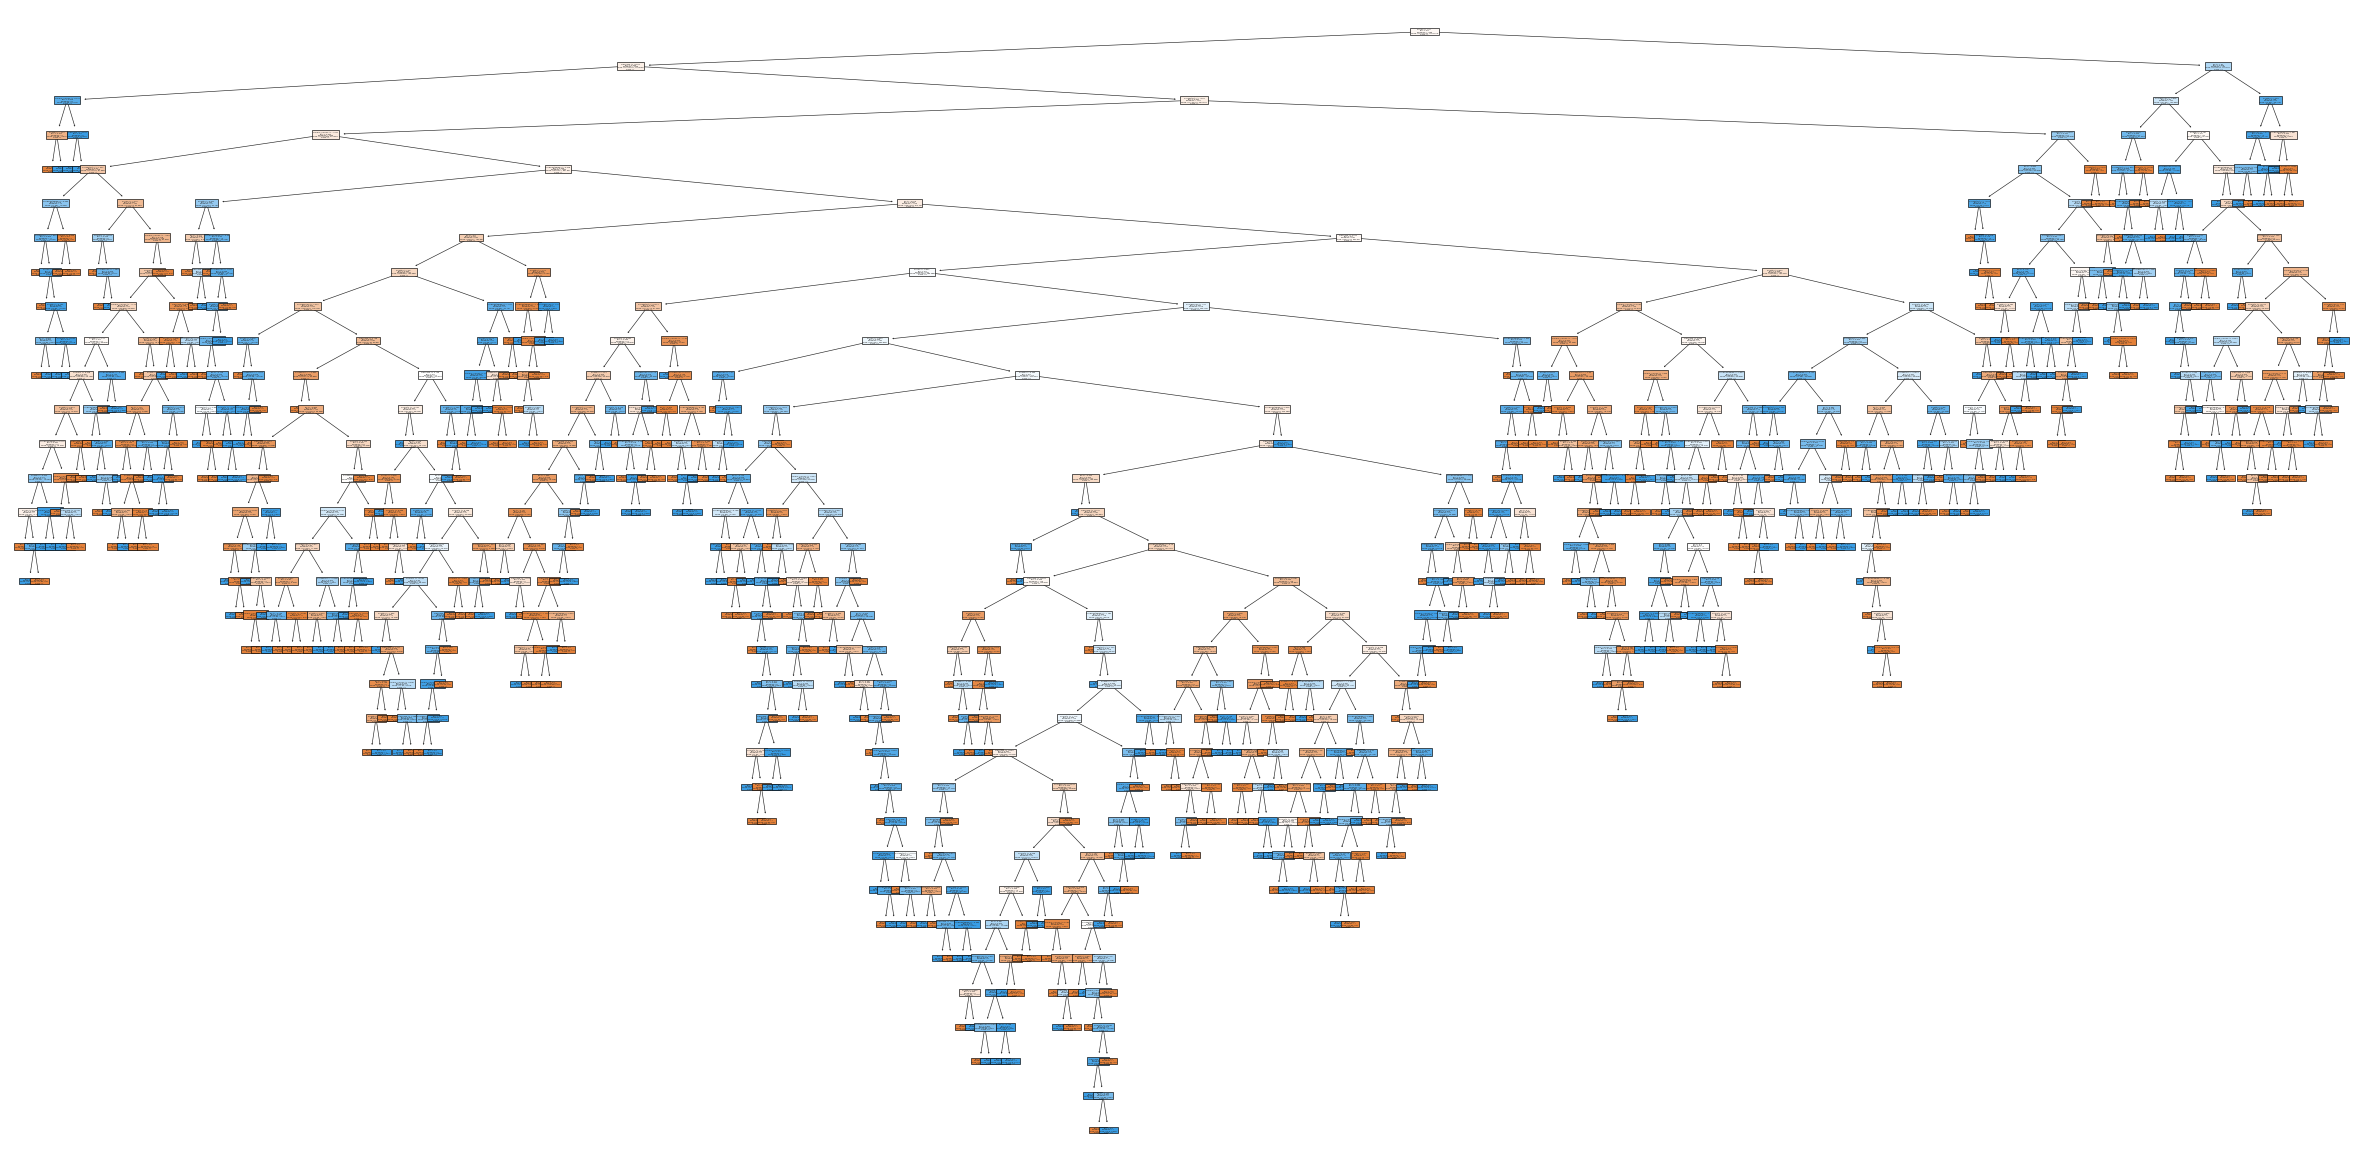

In [137]:
features = list(X.columns)
targets = str(df.Potability.unique())

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=150)
plot_tree(RF_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True);

<a id="7.5"></a>
<font color="lightseagreen" size=+1.5><b>7.5 The Implementation of K-Nearest Neighbor (KNN)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [138]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

<a id="7.5.a"></a>
<font color="lightseagreen" size=+0.5><b>7.5.a Modelling K-Nearest Neighbor (KNN) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[403  97]
 [206 113]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       500
           1       0.54      0.35      0.43       319

    accuracy                           0.63       819
   macro avg       0.60      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.760     0.630
Precision      0.756     0.538
Recall         0.568     0.354
f1             0.649     0.427

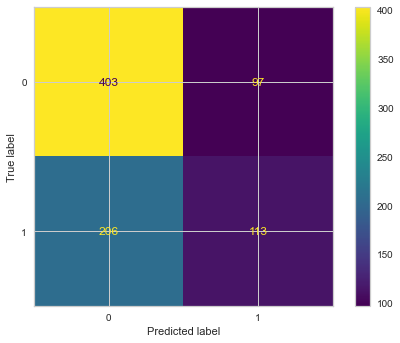

In [139]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [140]:
y_pred_proba = KNN_model.predict_proba(X_test_scaled)

In [141]:
pd.DataFrame(y_pred_proba)

0     1
0   0.800 0.200
1   0.600 0.400
2   0.600 0.400
3   0.800 0.200
4   0.600 0.400
..    ...   ...
814 1.000 0.000
815 0.800 0.200
816 0.800 0.200
817 1.000 0.000
818 0.800 0.200

[819 rows x 2 columns]

In [142]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [143]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
801        1     0    0.400    0.600
2278       0     0    0.200    0.800
251        1     1    0.800    0.200
490        0     0    0.400    0.600
566        0     0    0.200    0.800
3046       0     0    0.400    0.600
1103       1     0    0.200    0.800
2420       1     1    0.800    0.200
1343       0     0    0.000    1.000
797        1     0    0.200    0.800

<a id="7.5.b"></a>
<font color="lightseagreen" size=+0.5><b>7.5.b Cross-Validating K-Nearest Neighbor (KNN)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [145]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.007       0.033          0.638                 0.612   
2      0.007       0.037          0.626                 0.598   
3      0.006       0.035          0.565                 0.523   
4      0.007       0.035          0.646                 0.622   
5      0.009       0.038          0.614                 0.581   
6      0.008       0.039          0.618                 0.588   
7      0.007       0.036          0.581                 0.540   
8      0.007       0.036          0.600                 0.560   
9      0.007       0.046          0.608                 0.579   
10     0.021       0.038          0.633                 0.605   

    test_recall_macro  test_f1_macro  
1               0.598          0.599  
2               0.588          0.589  
3               0.520          0.515  
4               0.609          0.610  
5               0.567          0.564  
6               0.578          0.578  
7               0.533          0.528  
8               0.548          0.542  
9               0.572          0.572  
10              0.587          0.585

In [146]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy          0.613
test_precision_macro   0.581
test_recall_macro      0.570
test_f1_macro          0.568
dtype: float64

<a id="7.5.c"></a>
<font color="lightseagreen" size=+0.5><b>7.5.c Elbow Method for Choosing Reasonable K Values</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [147]:
test_error_rates = []


for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [148]:
test_error_rates

[0.40415140415140416,
 0.37484737484737485,
 0.3797313797313797,
 0.3565323565323565,
 0.36996336996337,
 0.3711843711843712,
 0.391941391941392,
 0.36996336996337,
 0.36996336996337,
 0.36874236874236876,
 0.3785103785103785,
 0.36019536019536025,
 0.36752136752136755,
 0.3565323565323565,
 0.3565323565323565,
 0.34554334554334554,
 0.3504273504273504,
 0.35286935286935284,
 0.35286935286935284,
 0.3516483516483516,
 0.3577533577533577,
 0.3504273504273504,
 0.3443223443223443,
 0.3443223443223443,
 0.35286935286935284,
 0.3516483516483516,
 0.3516483516483516,
 0.35531135531135527,
 0.3577533577533577]

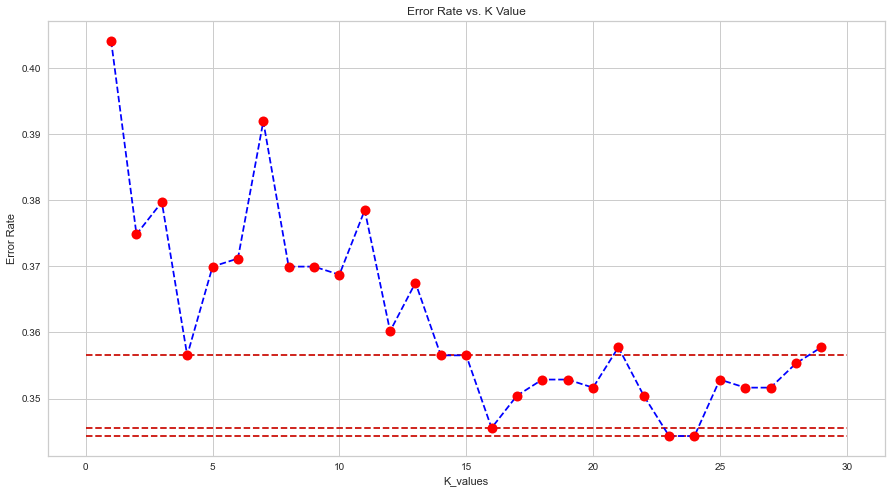

In [149]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.3443223443223443, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.3565323565323565, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.34554334554334554, xmin=0, xmax=30, colors='r', linestyles="--");

<a id="7.5.d"></a>
<font color="lightseagreen" size=+0.5><b>7.5.d GridsearchCV for Choosing Reasonable K Values</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [150]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [151]:
KNN_grid = KNeighborsClassifier()

In [152]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')

In [153]:
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's look at the best parameters & estimator found by GridSearchCV.

In [154]:
print(colored('\033[1mBest Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for KNN Model: {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for KNN Model: KNeighborsClassifier(n_neighbors=20, weights='distance')


WITH K=4
-------------------
[[403  97]
 [206 113]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       500
           1       0.54      0.35      0.43       319

    accuracy                           0.63       819
   macro avg       0.60      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.749     0.630
Precision      0.879     0.538
Recall         0.415     0.354
f1             0.564     0.427

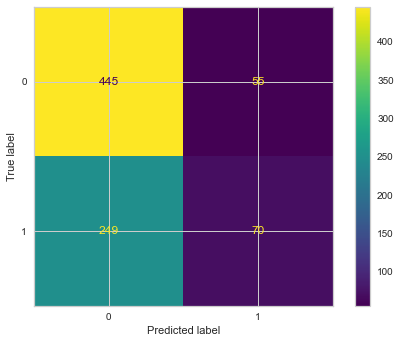

In [155]:
# NOW WITH K=4

KNN_model = KNeighborsClassifier(n_neighbors=4, p=1)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn4_f1 = f1_score(y_test, y_pred)
knn4_acc = accuracy_score(y_test, y_pred)
knn4_recall = recall_score(y_test, y_pred)
knn4_auc = roc_auc_score(y_test, y_pred)

print('WITH K=4')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=16
-------------------
[[403  97]
 [206 113]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       500
           1       0.54      0.35      0.43       319

    accuracy                           0.63       819
   macro avg       0.60      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.682     0.630
Precision      0.741     0.538
Recall         0.284     0.354
f1             0.410     0.427

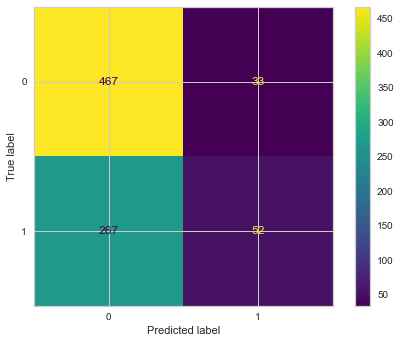

In [156]:
# NOW WITH K=16

KNN_model = KNeighborsClassifier(n_neighbors=16, p=1)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn16_f1 = f1_score(y_test, y_pred)
knn16_acc = accuracy_score(y_test, y_pred)
knn16_recall = recall_score(y_test, y_pred)
knn16_auc = roc_auc_score(y_test, y_pred)

print('WITH K=16')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

<a id="7.5.e"></a>
<font color="lightseagreen" size=+0.5><b>7.5.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

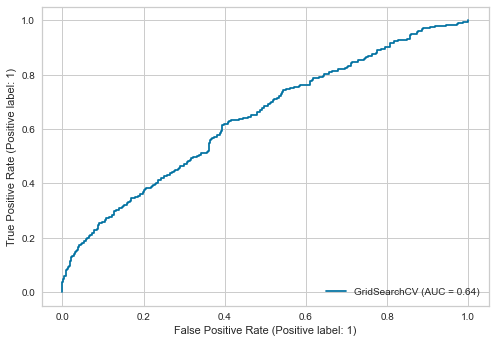

In [157]:
plot_roc_curve(KNN_grid_model, X_test_scaled, y_test);

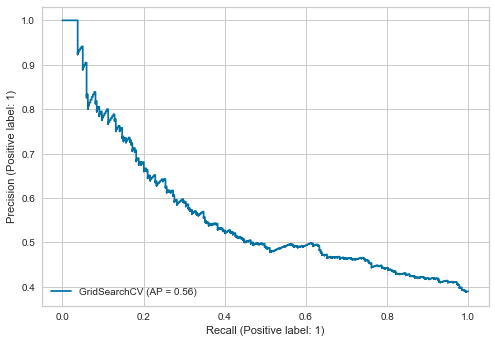

In [158]:
plot_precision_recall_curve(KNN_grid_model, X_test_scaled, y_test);

<a id="7.6"></a>
<font color="lightseagreen" size=+1.5><b>7.6 The Implementation of GradientBoosting (GB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [159]:
# from sklearn.ensemble import GradientBoostingClassifier

<a id="7.6.a"></a>
<font color="lightseagreen" size=+0.5><b>7.6.a Modelling GradientBoosting (GB) with Default Parameters</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<IPython.core.display.Javascript object>

[[459  41]
 [245  74]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       500
           1       0.64      0.23      0.34       319

    accuracy                           0.65       819
   macro avg       0.65      0.57      0.55       819
weighted avg       0.65      0.65      0.60       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.748     0.651
Precision      0.888     0.643
Recall         0.405     0.232
f1             0.556     0.341

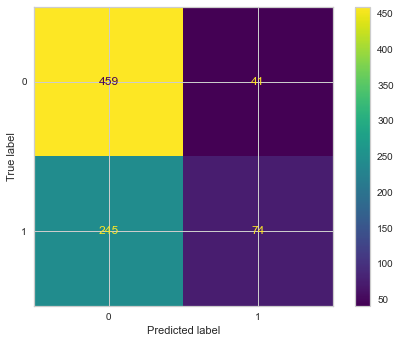

In [160]:
GB_model = GradientBoostingClassifier(random_state=42)
GB_model.fit(X_train_scaled, y_train)
y_pred = GB_model.predict(X_test_scaled)
y_train_pred = GB_model.predict(X_train_scaled)

gb_f1 = f1_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Cross-checking the model by predictions in Train Set for consistency**

[[1449   49]
 [ 571  388]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1498
           1       0.89      0.40      0.56       959

    accuracy                           0.75      2457
   macro avg       0.80      0.69      0.69      2457
weighted avg       0.78      0.75      0.72      2457

--------------------------------------------------------


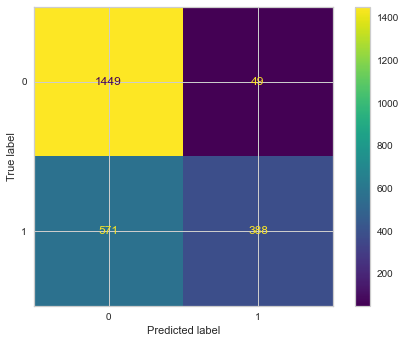

In [161]:
y_train_pred = GB_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_train_scaled, y_train);

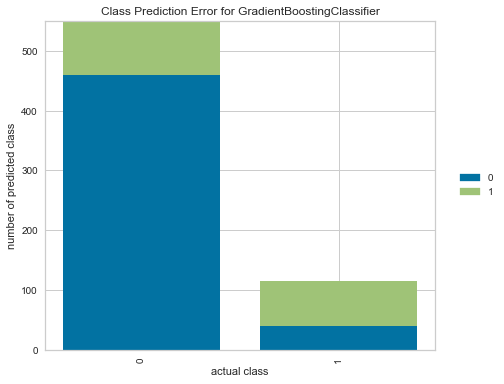

In [162]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(GB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

<a id="7.6.b"></a>
<font color="lightseagreen" size=+0.5><b>7.6.b Cross-Validating GradientBoosting (GB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [163]:
gb_xvalid_model = GradientBoostingClassifier(random_state=42)

gb_xvalid_model_scores = cross_validate(gb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
gb_xvalid_model_scores = pd.DataFrame(gb_xvalid_model_scores, index = range(1, 11))

gb_xvalid_model_scores

<IPython.core.display.Javascript object>

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.983       0.055          0.663                 0.656   
2      1.060       0.006          0.663                 0.647   
3      0.854       0.005          0.634                 0.612   
4      0.804       0.008          0.638                 0.627   
5      0.836       0.006          0.589                 0.517   
6      0.820       0.008          0.667                 0.657   
7      0.804       0.005          0.671                 0.679   
8      0.819       0.013          0.600                 0.540   
9      0.725       0.010          0.645                 0.622   
10     0.786       0.005          0.657                 0.647   

    test_recall_macro  test_f1_macro  
1               0.598          0.587  
2               0.607          0.603  
3               0.561          0.538  
4               0.559          0.528  
5               0.508          0.464  
6               0.607          0.601  
7               0.601          0.587  
8               0.521          0.487  
9               0.589          0.584  
10              0.594          0.584

In [164]:
gb_xvalid_model_scores.mean()

fit_time               0.849
score_time             0.012
test_accuracy          0.643
test_precision_macro   0.620
test_recall_macro      0.574
test_f1_macro          0.556
dtype: float64

<a id="7.6.c"></a>
<font color="lightseagreen" size=+0.5><b>7.6.c Feature Importance for GradientBoosting (GB) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [165]:
GB_model.feature_importances_

array([0.25448301, 0.10764095, 0.09798196, 0.11655676, 0.18275678,
       0.08696715, 0.04336477, 0.04047058, 0.06977804])

In [166]:
GB_feature_imp = pd.DataFrame(index = X.columns, data = GB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
GB_feature_imp

Feature Importance
ph                            0.254
Sulfate                       0.183
Chloramines                   0.117
Hardness                      0.108
Solids                        0.098
Conductivity                  0.087
Turbidity                     0.070
Organic_carbon                0.043
Trihalomethanes               0.040

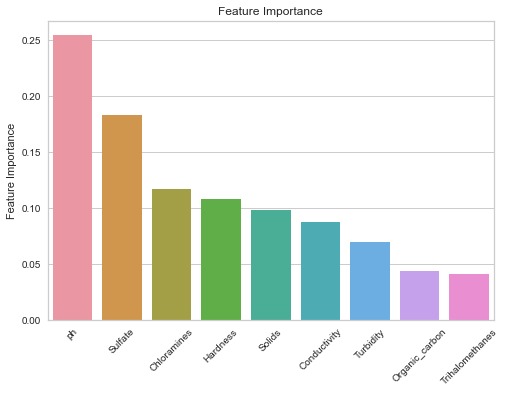

In [167]:
sns.barplot(y=GB_feature_imp["Feature Importance"], x=GB_feature_imp.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

<a id="7.6.d"></a>
<font color="lightseagreen" size=+0.5><b>7.6.d Modelling GradientBoosting (GB) Model with Best Parameters Using GridSeachCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [168]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [169]:
GB_grid_model = GradientBoostingClassifier(random_state=42)

GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [170]:
print(colored('\033[1mBest Parameters of GridSearchCV for GB Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for GB Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for GB Model: {'max_features': None, 'n_estimators': 300, 'subsample': 0.5}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for GB Model: GradientBoostingClassifier(n_estimators=300, random_state=42, subsample=0.5)


[[  0 500]
 [  0 319]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.39      1.00      0.56       319

    accuracy                           0.39       819
   macro avg       0.19      0.50      0.28       819
weighted avg       0.15      0.39      0.22       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.390     0.389
Precision      0.390     0.389
Recall         1.000     1.000
f1             0.561     0.561

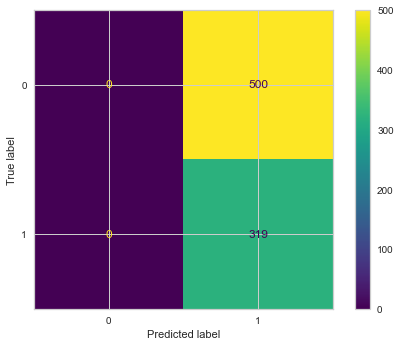

In [171]:
y_pred = GB_grid_model.predict(X_test_scaled)
y_train_pred = GB_grid_model.predict(X_train_scaled)

gb_grid_f1 = f1_score(y_test, y_pred)
gb_grid_acc = accuracy_score(y_test, y_pred)
gb_grid_recall = recall_score(y_test, y_pred)
gb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [172]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth=3, random_state=42)
    gb.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test_scaled, y_test)))
    print()

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.632
Accuracy score (test): 0.623



<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.656
Accuracy score (test): 0.632



<IPython.core.display.Javascript object>

Learning rate:  0.15
Accuracy score (training): 0.661
Accuracy score (test): 0.630



<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.698
Accuracy score (test): 0.642



<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.732
Accuracy score (test): 0.626



<IPython.core.display.Javascript object>

Learning rate:  0.6
Accuracy score (training): 0.729
Accuracy score (test): 0.628



<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.745
Accuracy score (test): 0.629



<IPython.core.display.Javascript object>

Learning rate:  0.85
Accuracy score (training): 0.757
Accuracy score (test): 0.624



<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.757
Accuracy score (test): 0.590



In [173]:
gb = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.85, subsample=0.5, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

Confusion Matrix:
[[332 168]
 [186 133]]

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       500
           1       0.44      0.42      0.43       319

    accuracy                           0.57       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.56      0.57      0.57       819



<a id="7.6.e"></a>
<font color="lightseagreen" size=+0.5><b>7.6.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

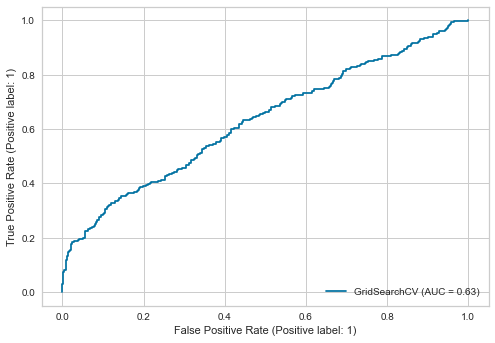

In [174]:
plot_roc_curve(GB_grid_model, X_test, y_test);

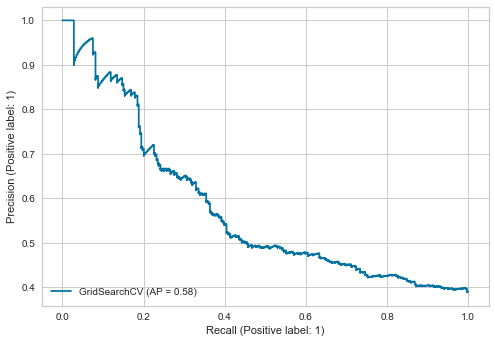

In [175]:
plot_precision_recall_curve(GB_grid_model, X_test, y_test);

<a id="7.7"></a>
<font color="lightseagreen" size=+1.5><b>7.7 The Implementation of AdaBoosting (AB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [176]:
### LIBRARIES NEEDED IN THIS SECTION ###

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.tree import plot_tree
# from sklearn.model_selection import GridSearchCV

<a id="7.7.a"></a>
<font color="lightseagreen" size=+0.5><b>7.7.a Modelling AdaBoostingBoosting (AB) with Default Parameters & Model Performance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[[430  70]
 [250  69]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       500
           1       0.50      0.22      0.30       319

    accuracy                           0.61       819
   macro avg       0.56      0.54      0.52       819
weighted avg       0.58      0.61      0.56       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.663     0.609
Precision      0.663     0.496
Recall         0.278     0.216
f1             0.392     0.301

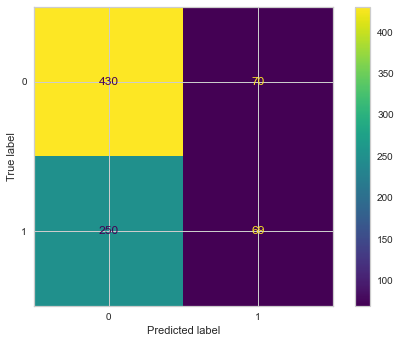

In [177]:
AB_model = AdaBoostClassifier(n_estimators=50, random_state=42)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
y_train_pred = AB_model.predict(X_train)

ab_f1 = f1_score(y_test, y_pred)
ab_acc = accuracy_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Cross-checking the model by predictions in Train Set for consistency**

[[1362  136]
 [ 692  267]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.91      0.77      1498
           1       0.66      0.28      0.39       959

    accuracy                           0.66      2457
   macro avg       0.66      0.59      0.58      2457
weighted avg       0.66      0.66      0.62      2457

--------------------------------------------------------


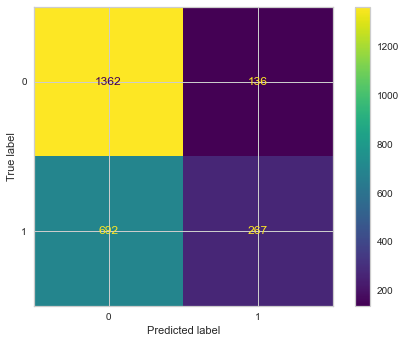

In [178]:
y_train_pred = AB_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

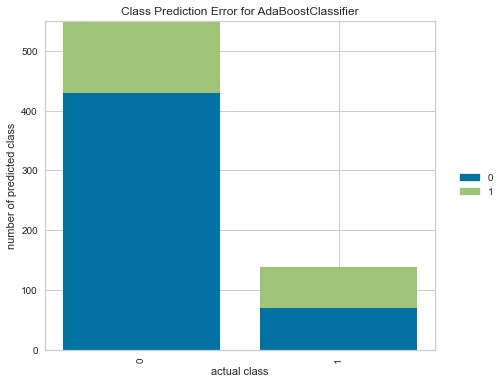

In [179]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(AB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

<a id="7.7.b"></a>
<font color="lightseagreen" size=+0.5><b>7.7.b Cross-Validating AdaBoostingBoosting (AB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [181]:
ab_xvalid_model = AdaBoostClassifier(n_estimators=50, random_state=42)

ab_xvalid_model_scores = cross_validate(ab_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
ab_xvalid_model_scores = pd.DataFrame(ab_xvalid_model_scores, index = range(1, 11))

ab_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.866       0.022          0.638           0.578        0.271    0.369
2      0.548       0.020          0.614           0.510        0.271    0.354
3      0.401       0.018          0.585           0.421        0.167    0.239
4      0.309       0.057          0.606           0.484        0.156    0.236
5      0.313       0.019          0.585           0.435        0.208    0.282
6      0.332       0.033          0.618           0.533        0.167    0.254
7      0.325       0.032          0.589           0.439        0.188    0.263
8      0.286       0.019          0.567           0.366        0.158    0.221
9      0.289       0.029          0.604           0.490        0.250    0.331
10     0.733       0.038          0.624           0.556        0.208    0.303

In [182]:
ab_xvalid_model_scores.mean()

fit_time         0.440
score_time       0.029
test_accuracy    0.603
test_precision   0.481
test_recall      0.204
test_f1          0.285
dtype: float64

<a id="7.7.c"></a>
<font color="lightseagreen" size=+0.5><b>7.7.c The Visualization of the Tree</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [183]:
AB_model = AdaBoostClassifier(n_estimators=3, random_state=42)
AB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [184]:
# targets = df["Potability"].astype("str")
# targets

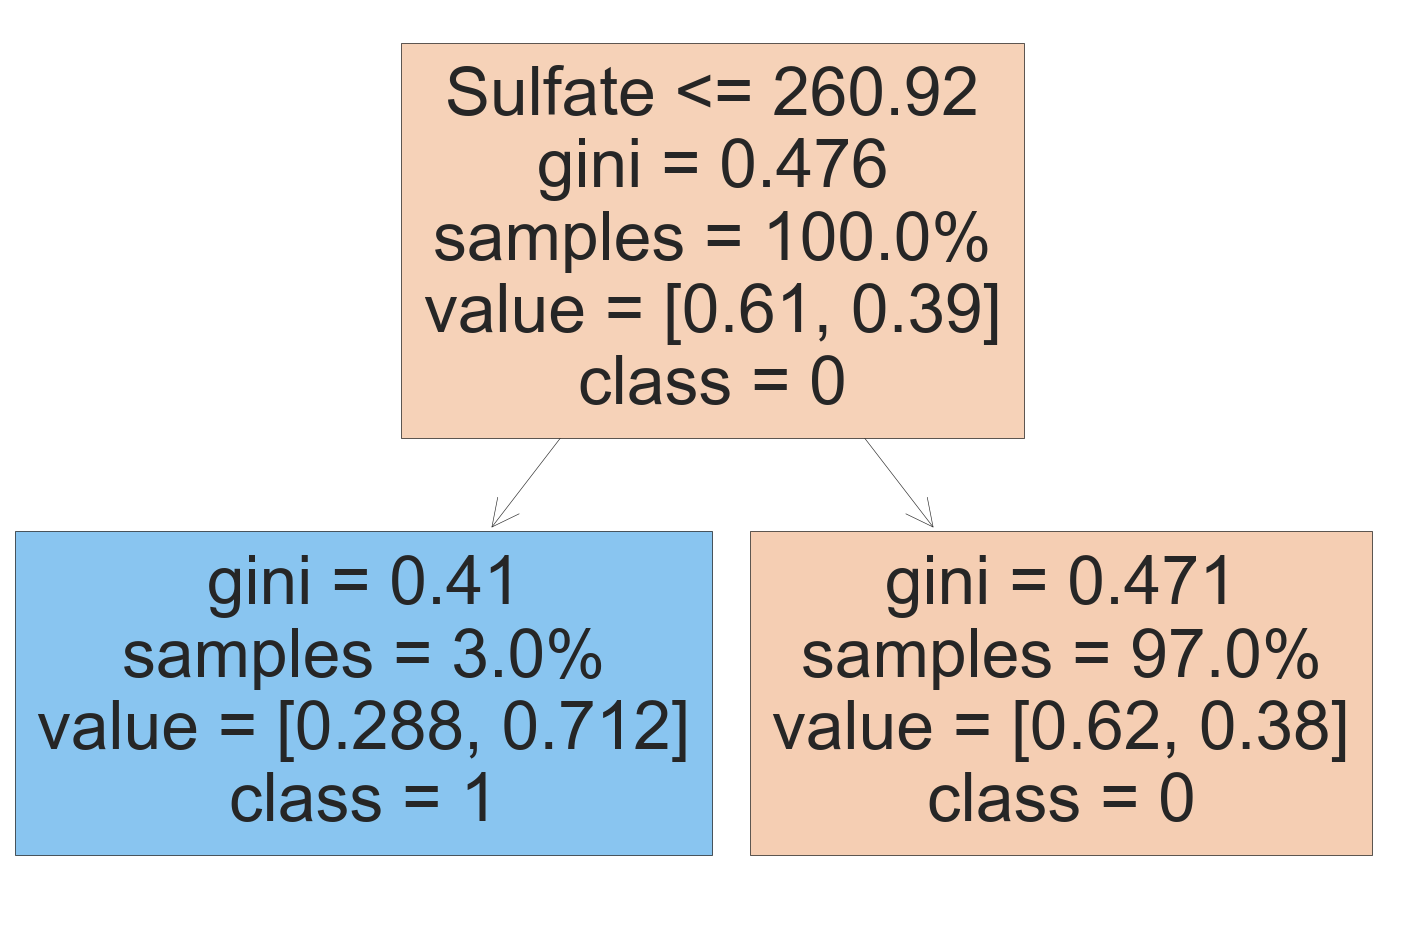

In [185]:
features = list(X.columns)
targets = df["Potability"].astype("str")

plt.figure(figsize=(12, 8),dpi=150)
plot_tree(AB_model.estimators_[0], filled=True, feature_names=features, class_names=targets.unique(), proportion=True);

<a id="7.7.d"></a>
<font color="lightseagreen" size=+0.5><b>7.7.d Analyzing Performance While Weak Learners Are Added</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [186]:
error_rates = []

for n in range(1, 100):
    
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    preds = AB_model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

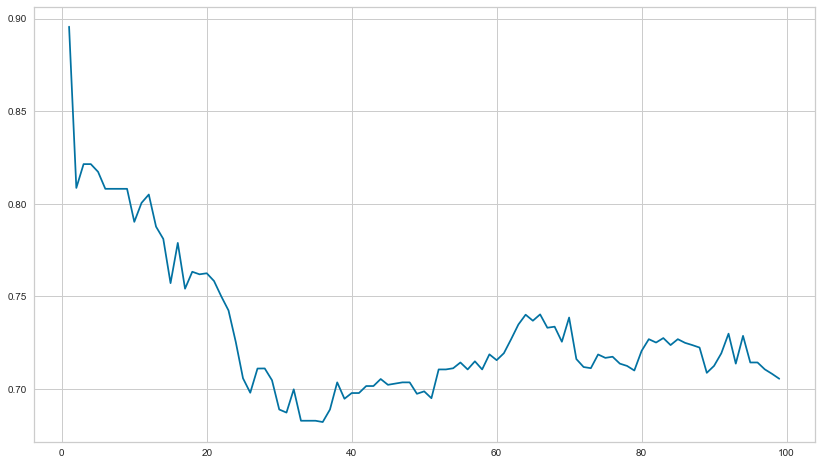

In [187]:
plt.figure(figsize=(14, 8))
plt.plot(range(1,100), error_rates);

<a id="7.7.e"></a>
<font color="lightseagreen" size=+0.5><b>7.7.e Feature Importance for AdaBoostingBoosting (AB) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [188]:
AB_model.feature_importances_

array([0.12121212, 0.12121212, 0.15151515, 0.09090909, 0.12121212,
       0.16161616, 0.08080808, 0.04040404, 0.11111111])

In [189]:
AB_feature_imp = pd.DataFrame(index = X.columns, data = AB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
AB_feature_imp

Feature Importance
Conductivity                  0.162
Solids                        0.152
ph                            0.121
Hardness                      0.121
Sulfate                       0.121
Turbidity                     0.111
Chloramines                   0.091
Organic_carbon                0.081
Trihalomethanes               0.040

In [190]:
imp_feats = AB_feature_imp.sort_values("Feature Importance")

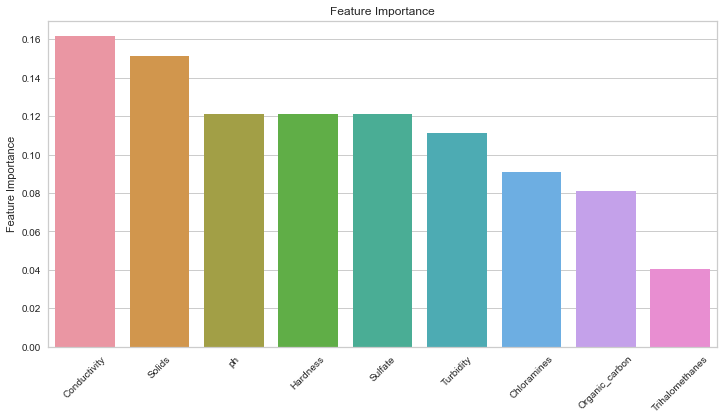

In [191]:
plt.figure(figsize=(12,6))
sns.barplot(y=AB_feature_imp["Feature Importance"], x=AB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

<a id="7.7.f"></a>
<font color="lightseagreen" size=+0.5><b>7.7.f Modelling AdaBoosting (AB) with Best Parameters Using GridSearchCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [192]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 1.0, 1.25, 1.5]}

In [193]:
AB_grid_model = AdaBoostClassifier(random_state=42)
AB_grid_model = GridSearchCV(AB_grid_model, param_grid, cv=5, scoring= 'f1')

In [194]:
AB_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.5, 1.0, 1.25, 1.5],
                         'n_estimators': [15, 20, 100, 500]},
             scoring='f1')

In [195]:
print(colored('\033[1mBest Parameters of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for AdaBoosting Model: {'learning_rate': 1.5, 'n_estimators': 500}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for AdaBoosting Model: AdaBoostClassifier(learning_rate=1.5, n_estimators=500, random_state=42)


[[369 131]
 [233  86]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       500
           1       0.40      0.27      0.32       319

    accuracy                           0.56       819
   macro avg       0.50      0.50      0.50       819
weighted avg       0.53      0.56      0.53       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.663     0.556
Precision      0.663     0.396
Recall         0.278     0.270
f1             0.392     0.321

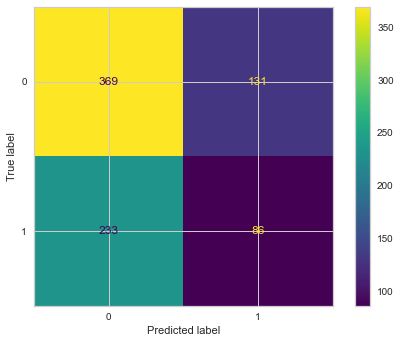

In [196]:
y_pred = AB_grid_model.predict(X_test)

ab_grid_f1 = f1_score(y_test, y_pred)
ab_grid_acc = accuracy_score(y_test, y_pred)
ab_grid_recall = recall_score(y_test, y_pred)
ab_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_grid_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[1375  123]
 [ 385  574]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1498
           1       0.82      0.60      0.69       959

    accuracy                           0.79      2457
   macro avg       0.80      0.76      0.77      2457
weighted avg       0.80      0.79      0.79      2457

--------------------------------------------------------


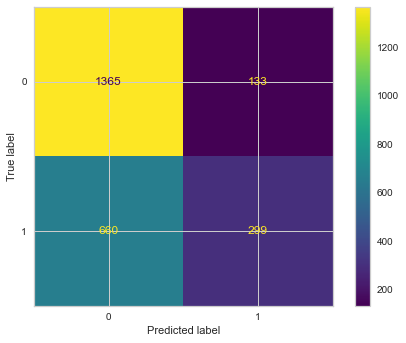

In [197]:
y_train_pred = AB_grid_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

In [198]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    ab = AdaBoostClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    ab.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ab.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(ab.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.622
Accuracy score (test): 0.623

Learning rate:  0.1
Accuracy score (training): 0.625
Accuracy score (test): 0.625

Learning rate:  0.15
Accuracy score (training): 0.633
Accuracy score (test): 0.625

Learning rate:  0.25
Accuracy score (training): 0.640
Accuracy score (test): 0.626

Learning rate:  0.5
Accuracy score (training): 0.645
Accuracy score (test): 0.618

Learning rate:  0.6
Accuracy score (training): 0.637
Accuracy score (test): 0.612

Learning rate:  0.75
Accuracy score (training): 0.639
Accuracy score (test): 0.611

Learning rate:  0.85
Accuracy score (training): 0.639
Accuracy score (test): 0.609

Learning rate:  1
Accuracy score (training): 0.638
Accuracy score (test): 0.608



In [199]:
gb = AdaBoostClassifier(n_estimators=20, learning_rate = 0.25, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[484  16]
 [290  29]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       500
           1       0.64      0.09      0.16       319

    accuracy                           0.63       819
   macro avg       0.63      0.53      0.46       819
weighted avg       0.63      0.63      0.53       819



<a id="7.7.g"></a>
<font color="lightseagreen" size=+0.5><b>7.7.g ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

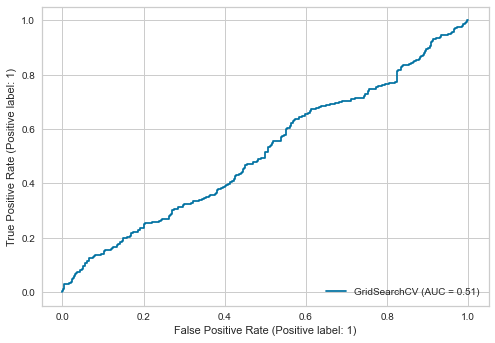

In [200]:
plot_roc_curve(AB_grid_model, X_test, y_test);


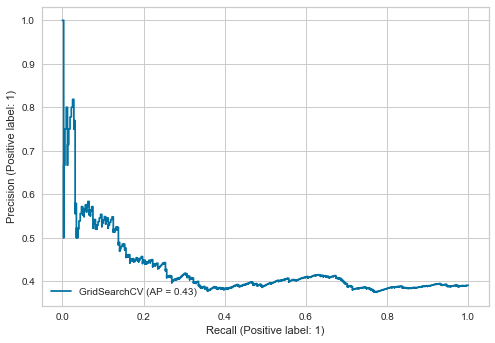

In [201]:
plot_precision_recall_curve(AB_grid_model, X_test, y_test);

<a id="7.8"></a>
<font color="lightseagreen" size=+1.5><b>7.8 The Implementation of XGBoosting (XGB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [202]:
### LIBRARIES NEEDED IN THIS SECTION ###

# from xgboost import XGBClassifier
# from yellowbrick.classifier import ClassPredictionError


<a id="7.8.a"></a>
<font color="lightseagreen" size=+0.5><b>7.8.a Modelling XGBoosting (XGB) with Default Parameters & Model Performance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

[21:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[395 105]
 [203 116]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       500
           1       0.52      0.36      0.43       319

    accuracy                           0.62       819
   macro avg       0.59      0.58      0.57       819
weighted avg       0.61      0.62      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.998     0.624
Precision      1.000     0.525
Recall         0.994     0.364
f1             0.997     0.430

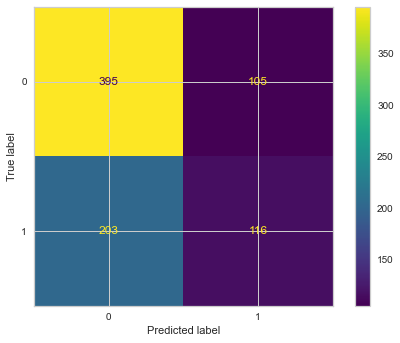

In [203]:
# Modelling without Scalling

XGB_model1 = XGBClassifier(random_state=42)
XGB_model1.fit(X_train, y_train)
y_pred = XGB_model1.predict(X_test)
y_train_pred = XGB_model1.predict(X_train)

xgb1_f1 = f1_score(y_test, y_pred)
xgb1_acc = accuracy_score(y_test, y_pred)
xgb1_recall = recall_score(y_test, y_pred)
xgb1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model1, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[21:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[395 105]
 [203 116]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       500
           1       0.52      0.36      0.43       319

    accuracy                           0.62       819
   macro avg       0.59      0.58      0.57       819
weighted avg       0.61      0.62      0.61       819

--------------------------------------------------------


train_set  test_set
Accuracy       0.998     0.624
Precision      1.000     0.525
Recall         0.994     0.364
f1             0.997     0.430

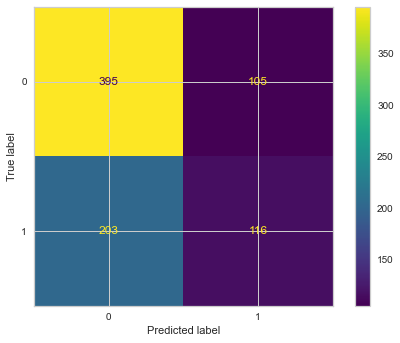

In [204]:
# Modelling with Scalling

XGB_model2 = XGBClassifier(random_state=42)
XGB_model2.fit(X_train_scaled, y_train)
y_pred = XGB_model2.predict(X_test_scaled)
y_train_pred = XGB_model2.predict(X_train_scaled)

xgb2_f1 = f1_score(y_test, y_pred)
xgb2_acc = accuracy_score(y_test, y_pred)
xgb2_recall = recall_score(y_test, y_pred)
xgb2_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model2, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Cross-checking the model by predictions in Train Set for consistency**

[[1498    0]
 [   6  953]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1498
           1       1.00      0.99      1.00       959

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457

--------------------------------------------------------


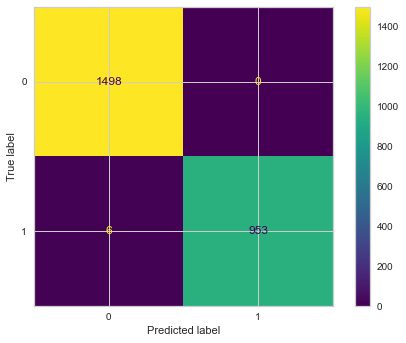

In [205]:
y_train_pred = XGB_model2.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model2, X_train_scaled, y_train);

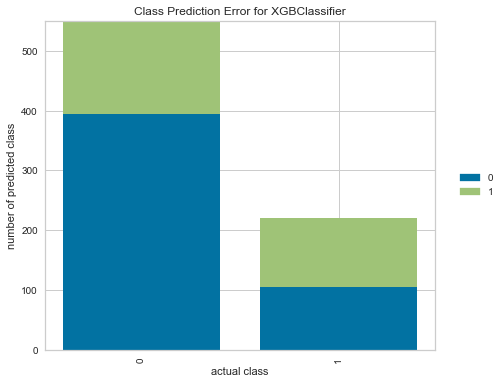

In [206]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(XGB_model2)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

<a id="7.8.b"></a>
<font color="lightseagreen" size=+0.5><b>7.8.b Cross-Validating XGBoosting (XGB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [207]:
xgb_xvalid_model = XGBClassifier(random_state=42)

xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
xgb_xvalid_model_scores = pd.DataFrame(xgb_xvalid_model_scores, index = range(1, 11))

xgb_xvalid_model_scores

[21:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

fit_time  score_time  test_accuracy  test_precision_micro  \
1      0.547       0.008          0.650                 0.650   
2      0.674       0.020          0.691                 0.691   
3      0.611       0.008          0.614                 0.614   
4      0.517       0.021          0.667                 0.667   
5      0.539       0.009          0.642                 0.642   
6      0.469       0.009          0.679                 0.679   
7      0.529       0.014          0.659                 0.659   
8      0.444       0.019          0.690                 0.690   
9      0.492       0.009          0.624                 0.624   
10     0.363       0.008          0.637                 0.637   

    test_recall_micro  test_f1_micro  
1               0.650          0.650  
2               0.691          0.691  
3               0.614          0.614  
4               0.667          0.667  
5               0.642          0.642  
6               0.679          0.679  
7               0.659          0.659  
8               0.690          0.690  
9               0.624          0.624  
10              0.637          0.637

In [208]:
xgb_xvalid_model_scores.mean()

fit_time               0.519
score_time             0.013
test_accuracy          0.655
test_precision_micro   0.655
test_recall_micro      0.655
test_f1_micro          0.655
dtype: float64

**With macro metrics**

In [209]:
xgb1_xvalid_model = XGBClassifier(random_state=42)

xgb1_xvalid_model_scores = cross_validate(xgb1_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
xgb1_xvalid_model_scores = pd.DataFrame(xgb1_xvalid_model_scores, index = range(1, 11))

xgb1_xvalid_model_scores

[21:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.503       0.008          0.650                 0.627   
2      0.500       0.008          0.691                 0.675   
3      0.464       0.008          0.614                 0.585   
4      0.391       0.012          0.667                 0.647   
5      0.704       0.010          0.642                 0.616   
6      0.919       0.018          0.679                 0.660   
7      0.639       0.012          0.659                 0.637   
8      0.481       0.008          0.690                 0.680   
9      0.356       0.008          0.624                 0.599   
10     0.589       0.014          0.637                 0.613   

    test_recall_macro  test_f1_macro  
1               0.616          0.618  
2               0.675          0.675  
3               0.578          0.579  
4               0.622          0.623  
5               0.592          0.590  
6               0.649          0.651  
7               0.617          0.618  
8               0.639          0.640  
9               0.591          0.592  
10              0.603          0.604

In [210]:
xgb1_xvalid_model_scores.mean()

fit_time               0.554
score_time             0.011
test_accuracy          0.655
test_precision_macro   0.634
test_recall_macro      0.618
test_f1_macro          0.619
dtype: float64

<a id="7.8.c"></a>
<font color="lightseagreen" size=+0.5><b>7.8.c Feature Importance for XGBoosting (XGB) Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [211]:
XGB_model2.feature_importances_  # scaled one

array([0.14957327, 0.11781386, 0.11844167, 0.12833168, 0.12497687,
       0.08625779, 0.09368968, 0.08878754, 0.09212765], dtype=float32)

In [212]:
feats = pd.DataFrame(index=X.columns, data=XGB_model2.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

Feature Importance
ph                            0.150
Chloramines                   0.128
Sulfate                       0.125
Solids                        0.118
Hardness                      0.118
Organic_carbon                0.094
Turbidity                     0.092
Trihalomethanes               0.089
Conductivity                  0.086

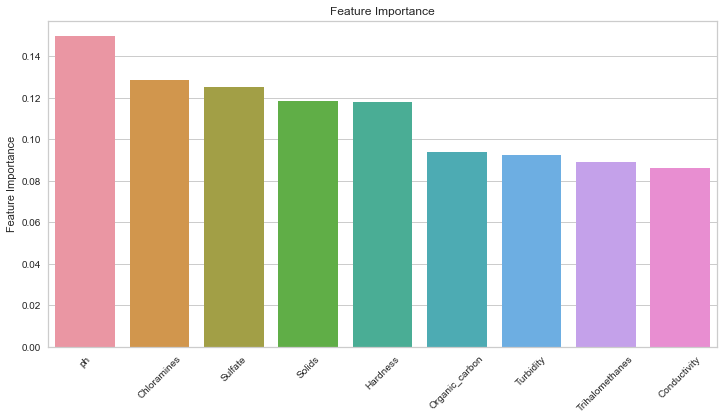

In [213]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

<a id="7.8.d"></a>
<font color="lightseagreen" size=+0.5><b>7.8.d Modelling XGBoosting (XGB) with Best Parameters Using GridSearchCV</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [214]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [215]:
XGB_grid_model = XGBClassifier(random_state=42)
XGB_grid_model = GridSearchCV(XGB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [216]:
XGB_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[21:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [217]:
print(colored('\033[1mBest Parameters of GridSearchCV for XGB Model:\033[0m', 'blue'), colored(XGB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for XGB Model:\033[0m', 'blue'), colored(XGB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for XGB Model: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for XGB Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[[382 118]
 [201 118]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       500
           1       0.50      0.37      0.43       319

    accuracy                           0.61       819
   macro avg       0.58      0.57      0.57       819
weighted avg       0.59      0.61      0.60       819

--------------------------------------------------------


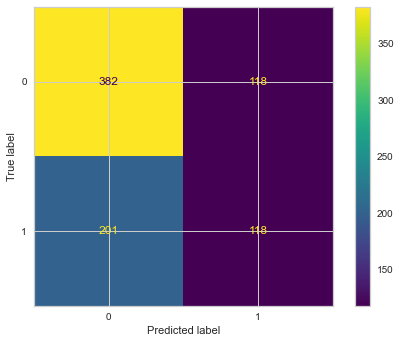

In [223]:
y_pred = XGB_grid_model.predict(X_test_scaled)
y_train_pred = XGB_grid_model.predict(X_train_scaled)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_grid_model, X_test_scaled, y_test);

[[1498    0]
 [   0  959]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1498
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457

--------------------------------------------------------


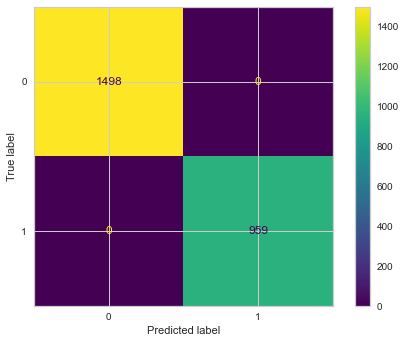

In [219]:
y_train_pred = XGB_grid_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_grid_model, X_train_scaled, y_train);

<a id="7.8.e"></a>
<font color="lightseagreen" size=+0.5><b>7.8.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

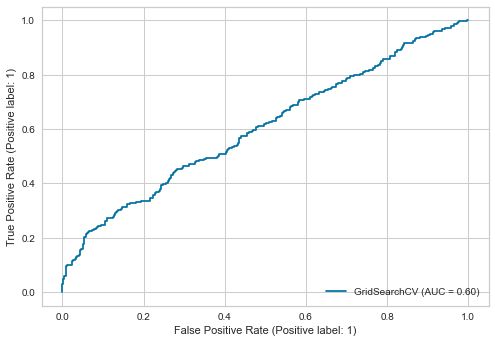

In [220]:
plot_roc_curve(XGB_grid_model, X_test_scaled, y_test);

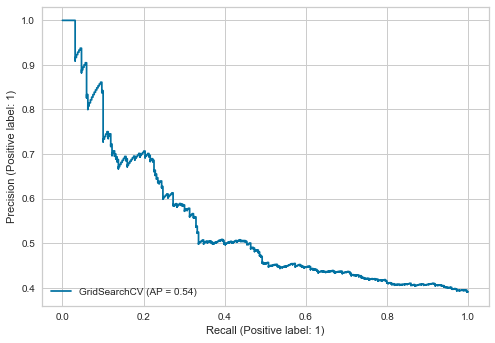

In [221]:
plot_precision_recall_curve(XGB_grid_model, X_test_scaled, y_test);

<a id="8"></a>
<font color="lightseagreen" size=+2.5><b>8) THE COMPARISON OF MODELS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

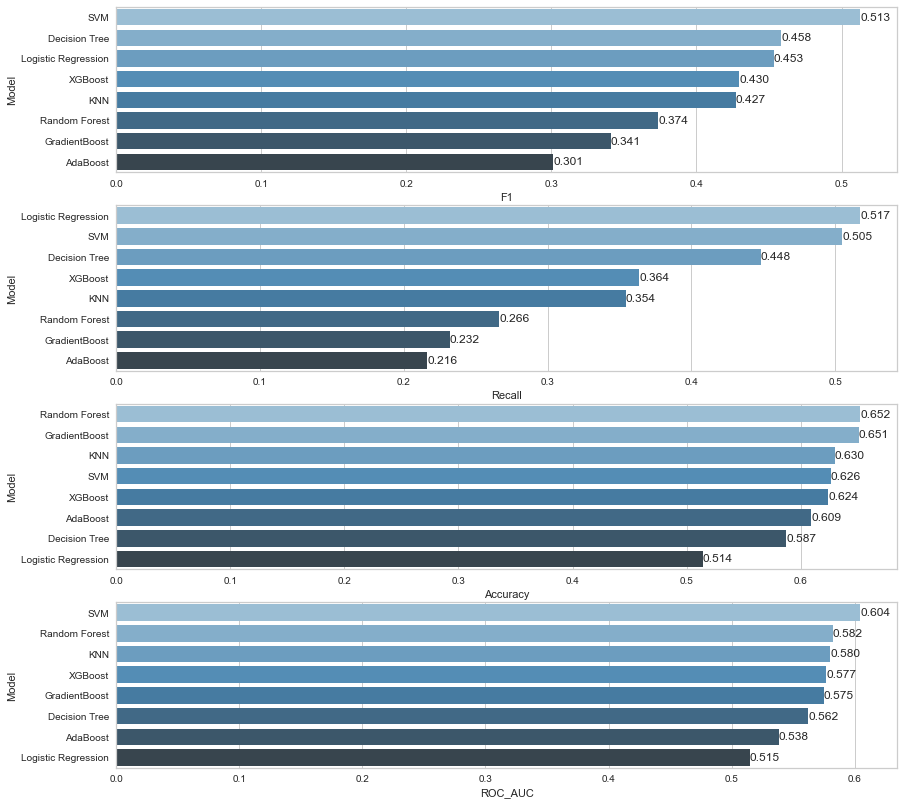

In [222]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, svm_f1, knn_f1, dt_f1, rf_f1, ab_f1, gb_f1, xgb2_f1],
                        "Recall": [log_recall, svm_recall, knn_recall, dt_recall, rf_recall, ab_recall, gb_recall, xgb2_recall],
                        "Accuracy": [log_acc, svm_acc, knn_acc, dt_acc, rf_acc, ab_acc, gb_acc, xgb2_acc],
                        "ROC_AUC": [log_auc, svm_auc, knn_auc, dt_auc, rf_auc, ab_auc, gb_auc, xgb2_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

<a id="9"></a>
<font color="lightseagreen" size=+2.5><b>9) CONCLUSION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="10"></a>
<font color="lightseagreen" size=+2.5><b>10) REFERENCES & FURTHER READINGS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>